<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/6310505688_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

**<font face="Lato" size=5 color=red>1. Importing dataset</font>**


In [ ]:
#Read Wine dataset
df = pd.read_csv("Wine.csv") #เนื่องจากครั้งนี้ใช้ Jupyter Notebook ซึ่งรันอยู่บนเครื่อง Notebook และไฟล์ที่ใช้อ่ยู่ใน folder เดียวกันกับไฟล์ ipynb ครับ
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [ ]:
df.shape

(178, 14)

**<font face="Lato" size=5 color=red>2. Exploring dataset</font>**


In [ ]:
# - Give summary statistics of your dataset (Numerical Columns)
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# Extracting numerical and categorical features
Categorical_Columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical Columns:\n {}'.format(Categorical_Columns))

Numerical_Columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical Columns:\n {}'.format(Numerical_Columns))

Categorical Columns:
 []
Numerical Columns:
 ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'Customer_Segment']


**<font face="Lato" size=4 color=orange>2.1 Numerical Features**

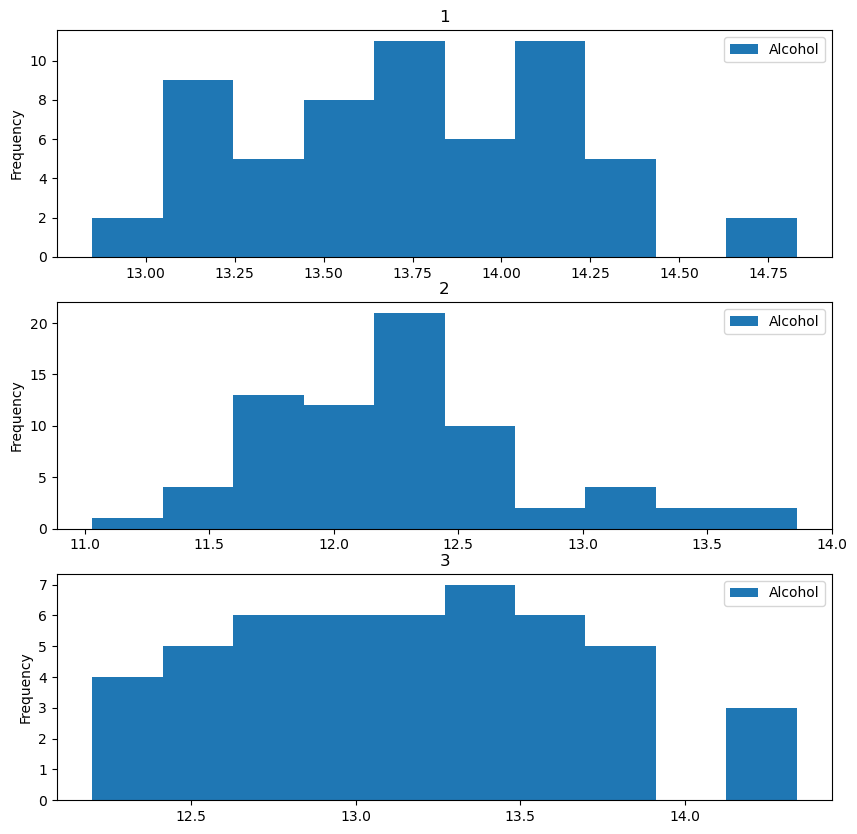

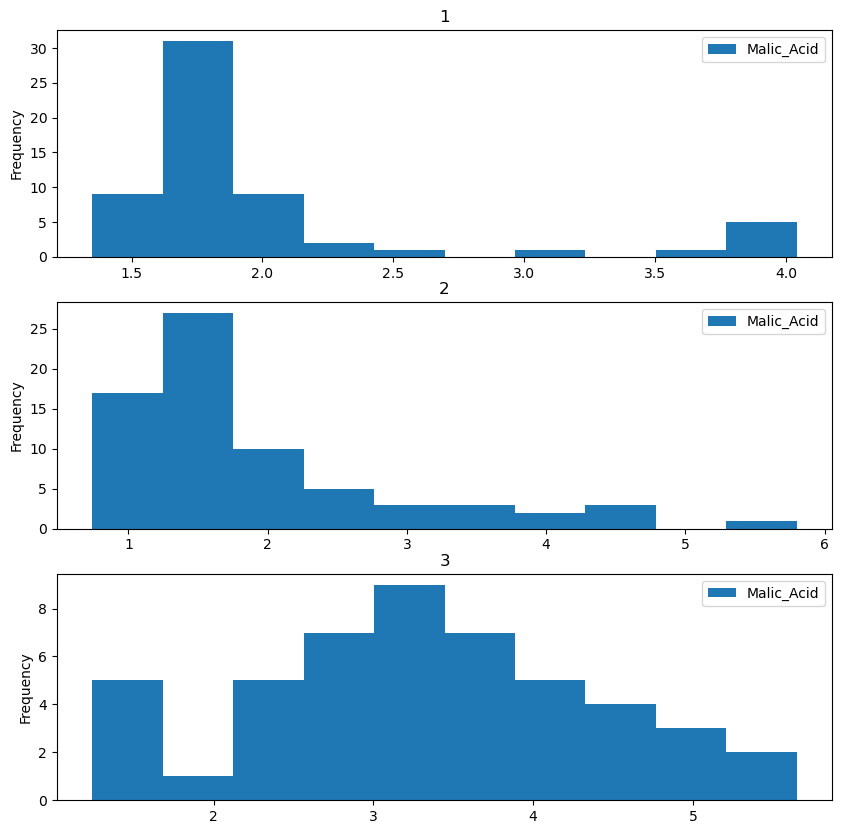

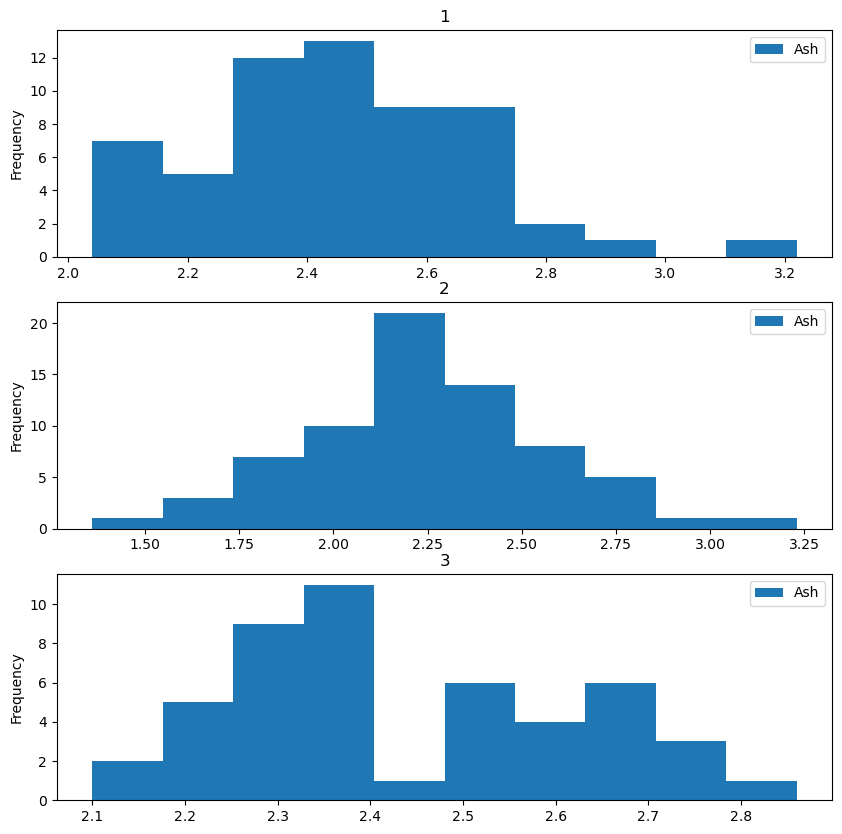

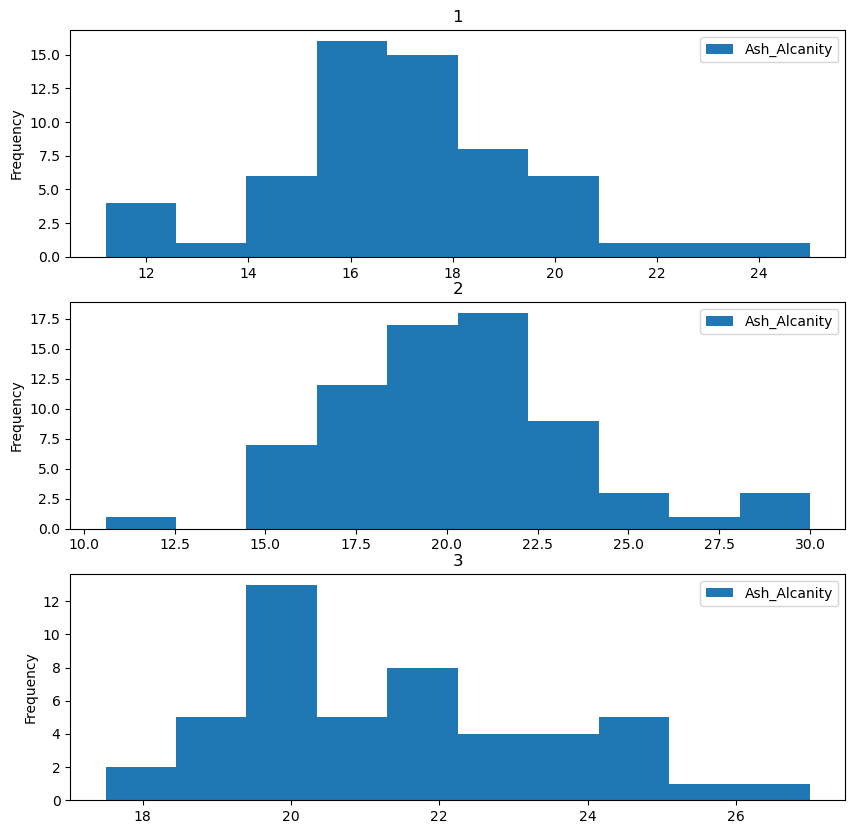

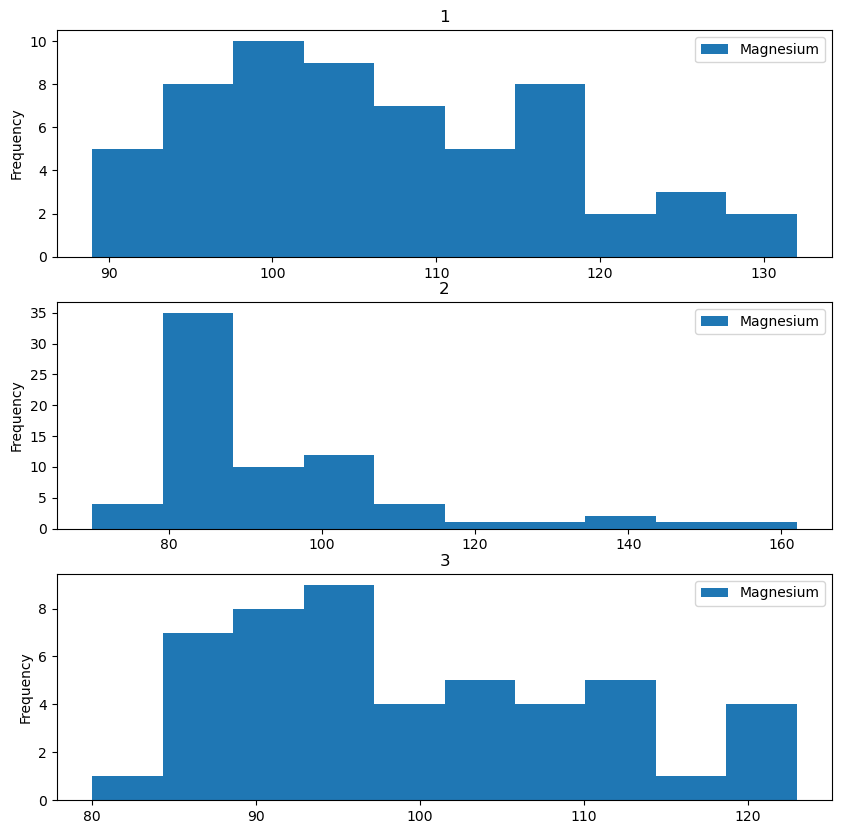

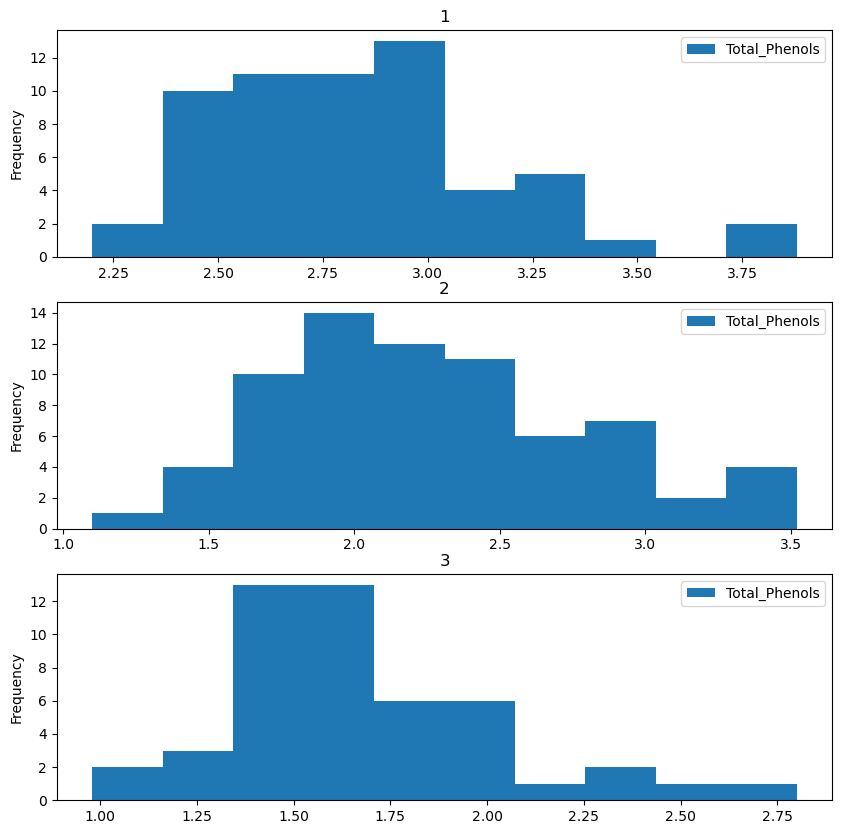

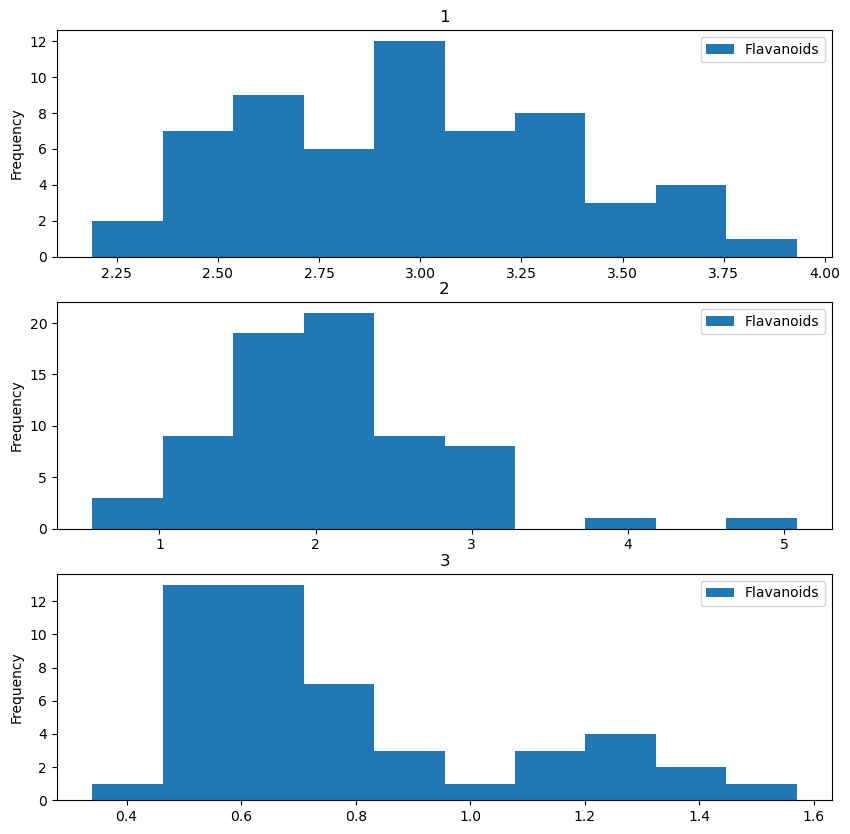

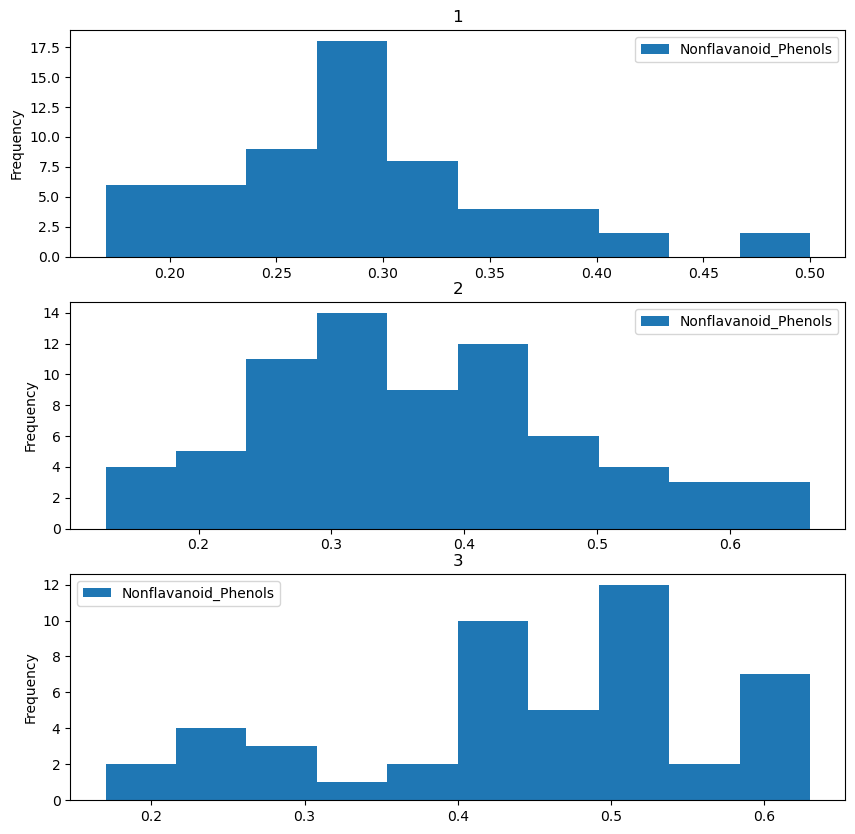

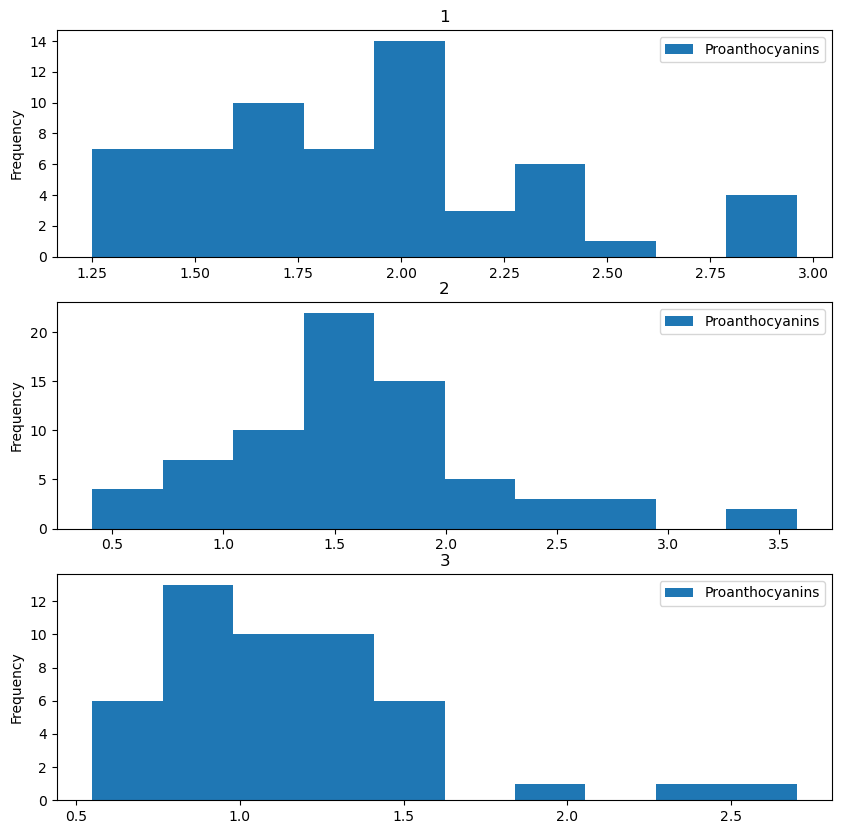

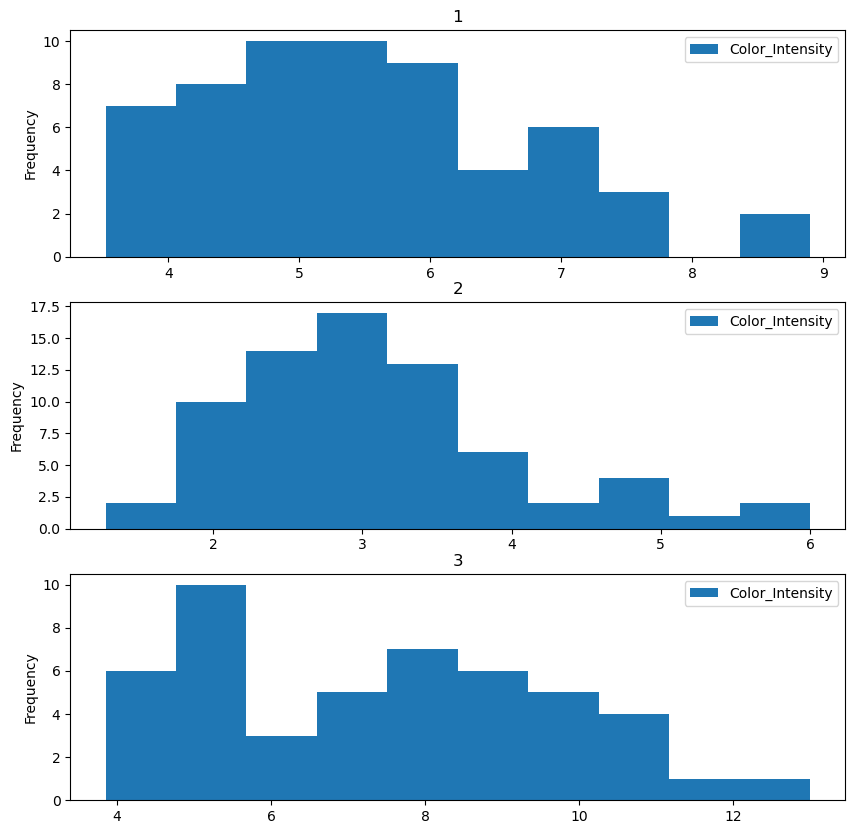

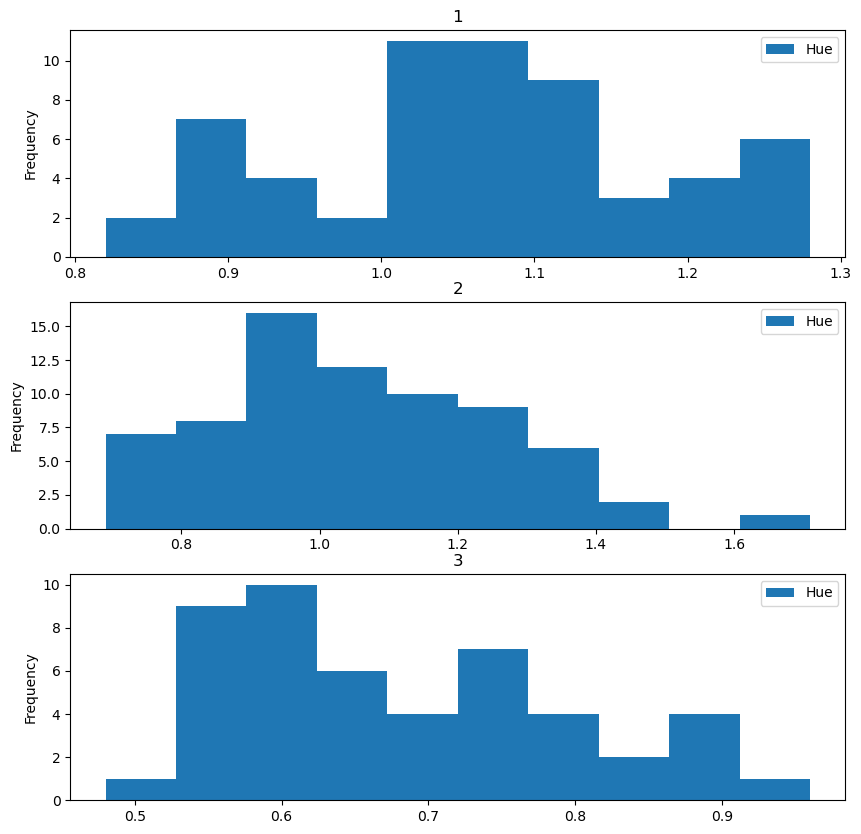

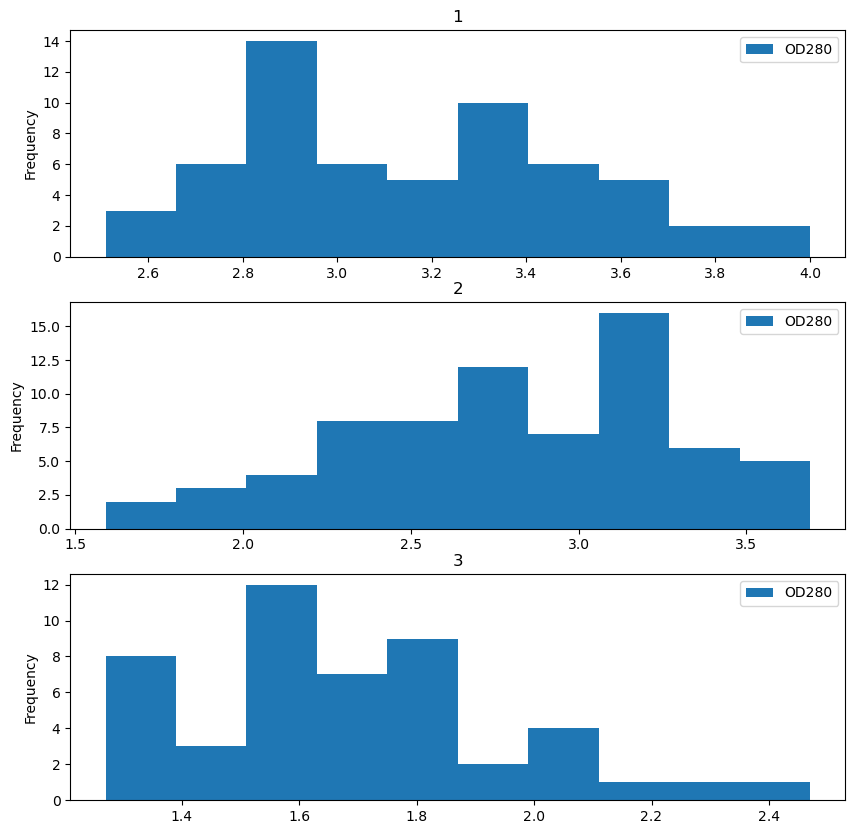

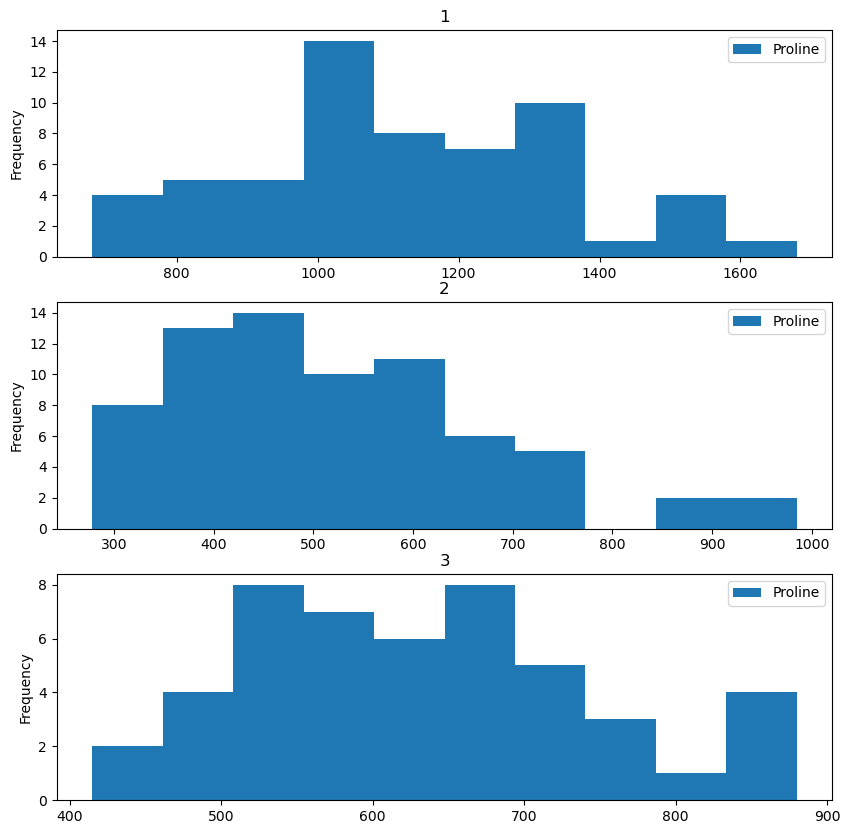

In [ ]:
# Construct a histogram of each numerical variables, with an overlay of the target variable.
for feature in Numerical_Columns:
    if feature == "Customer_Segment": continue
    df.plot.hist(column=feature, by="Customer_Segment", figsize=(10, 10))

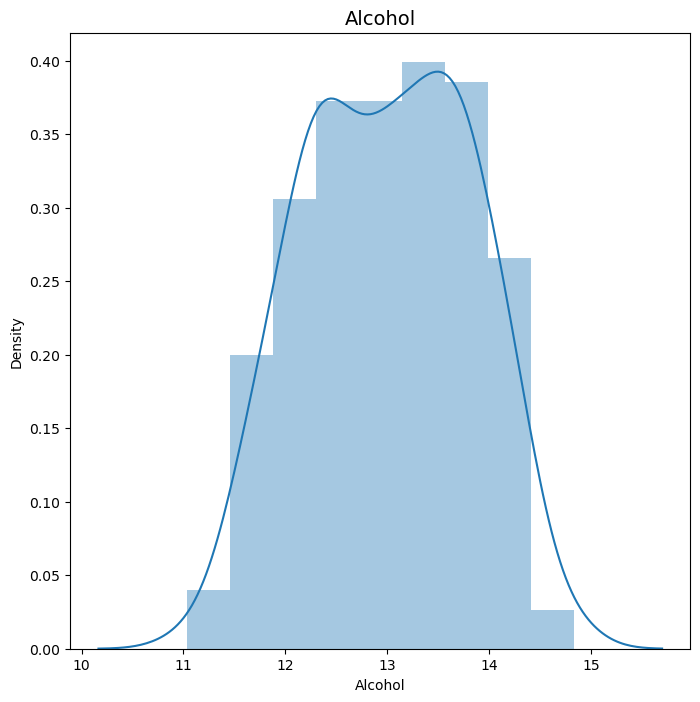

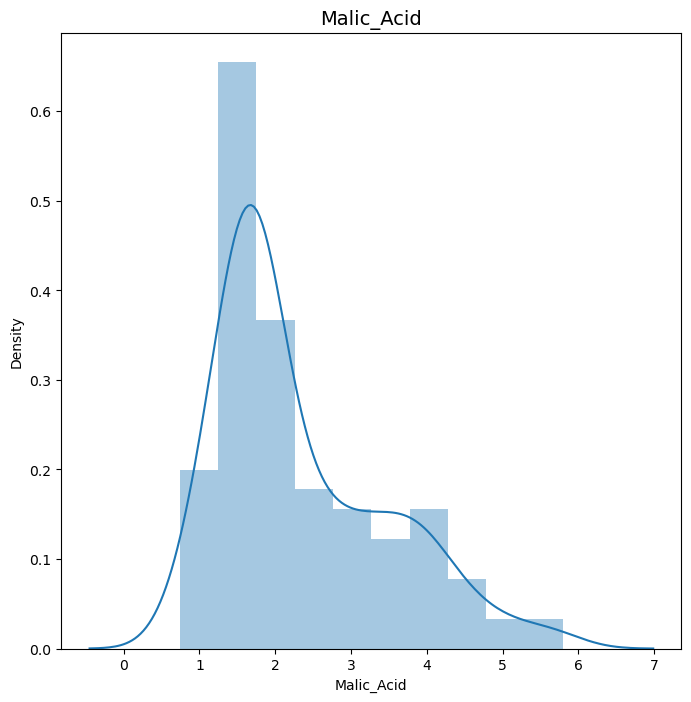

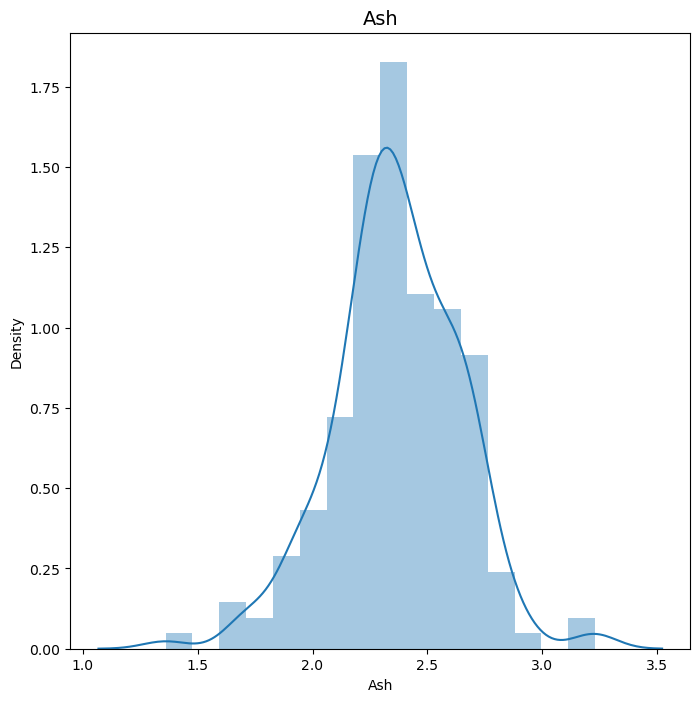

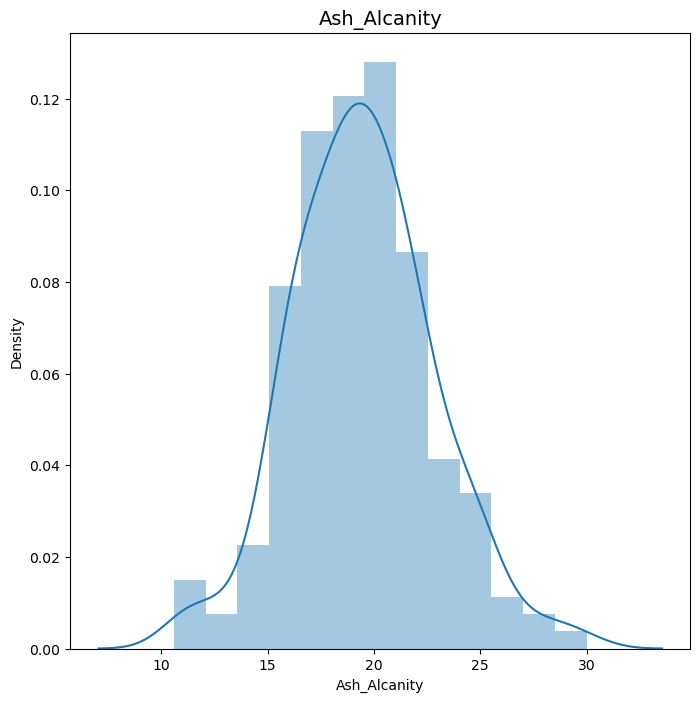

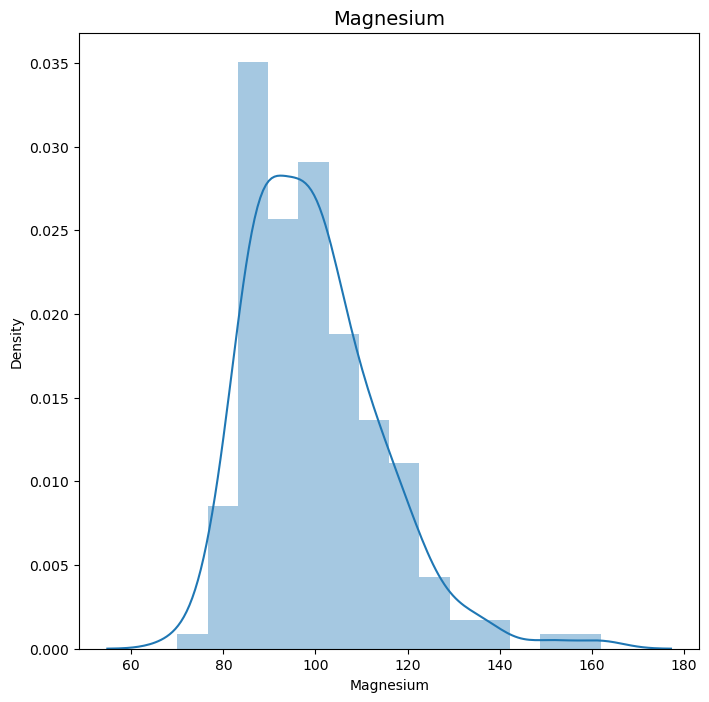

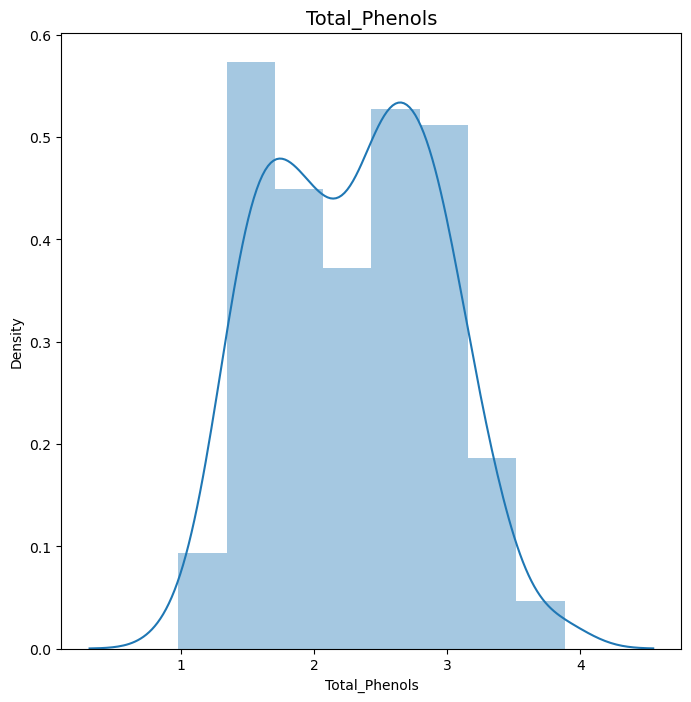

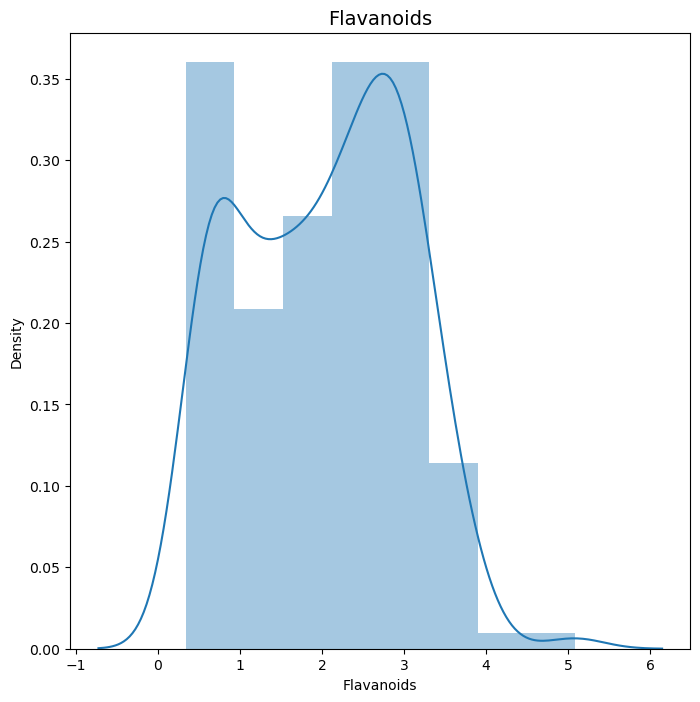

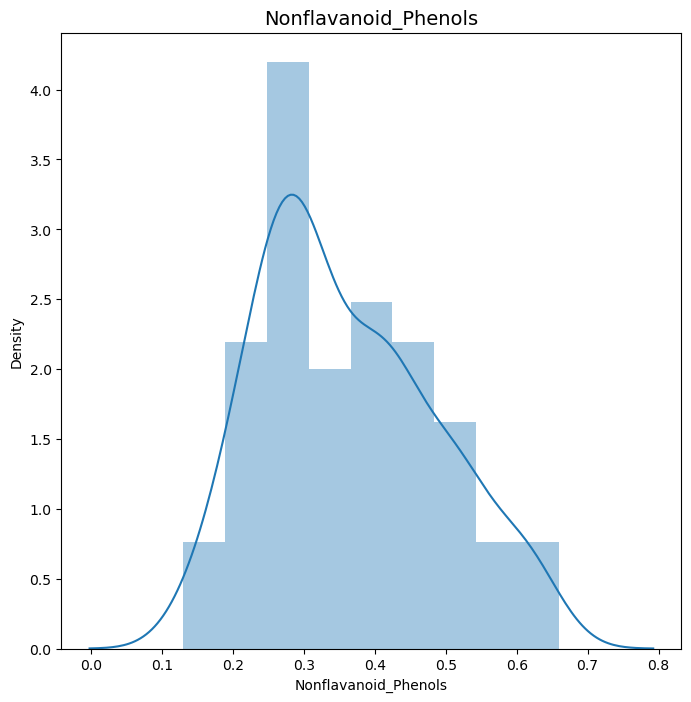

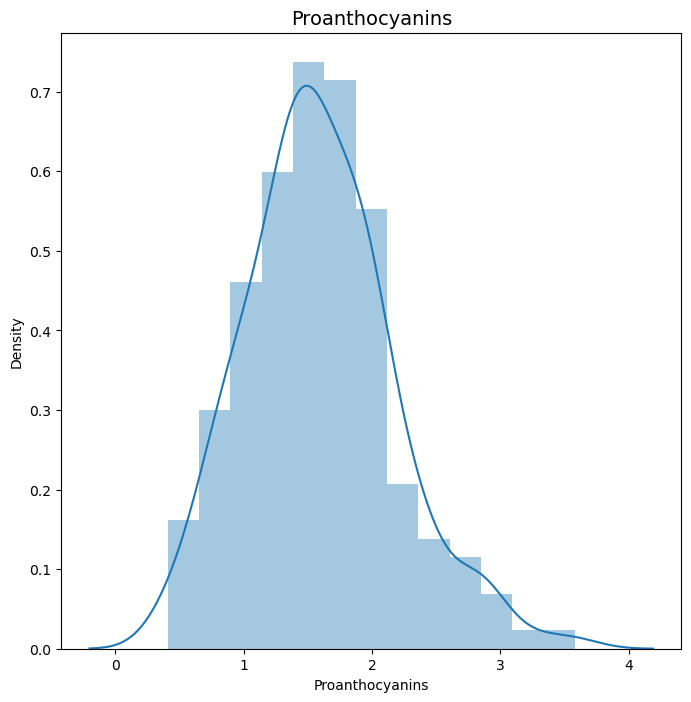

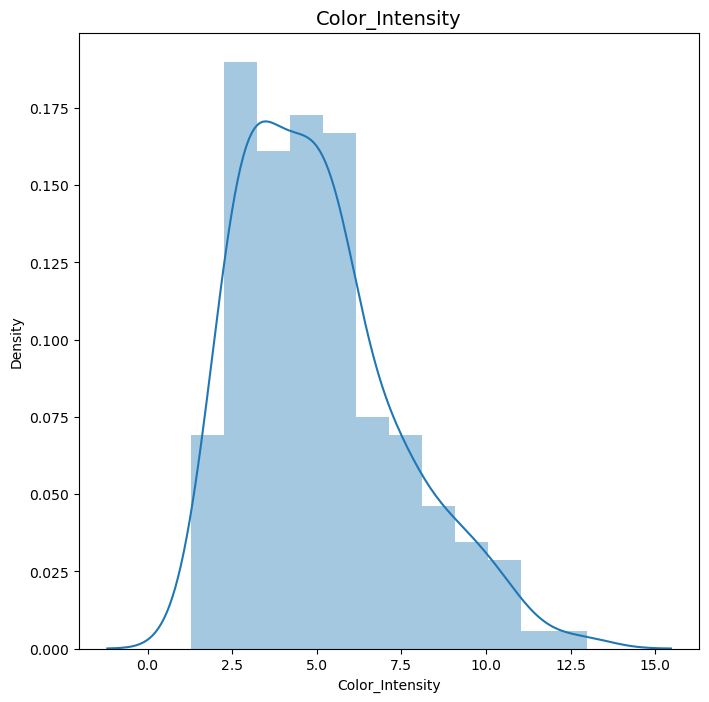

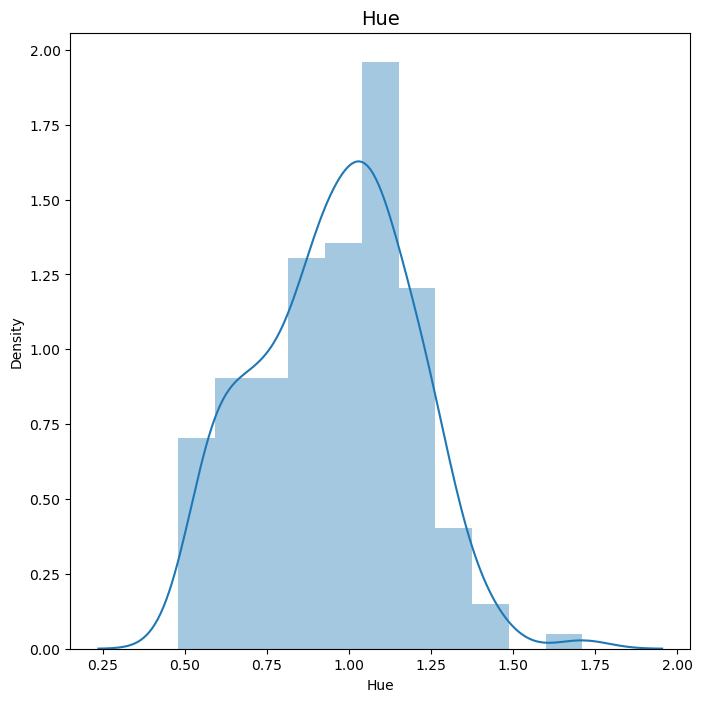

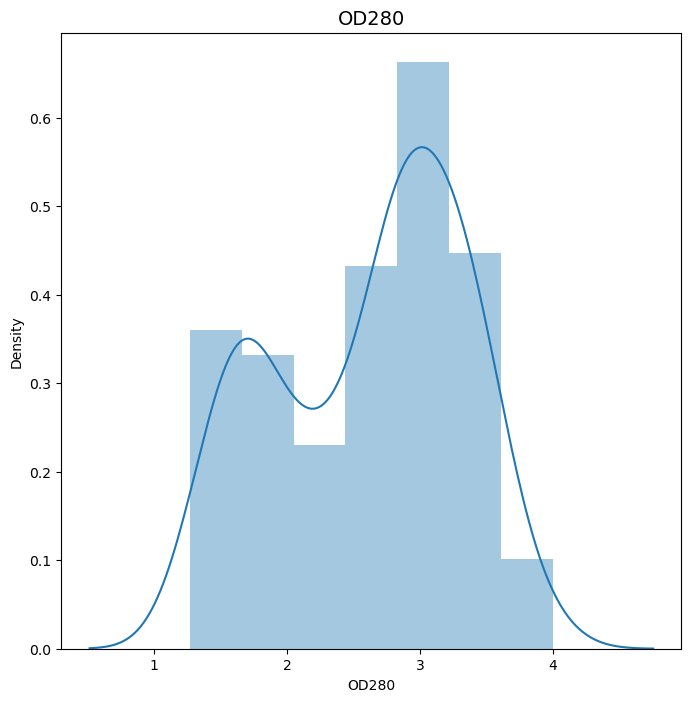

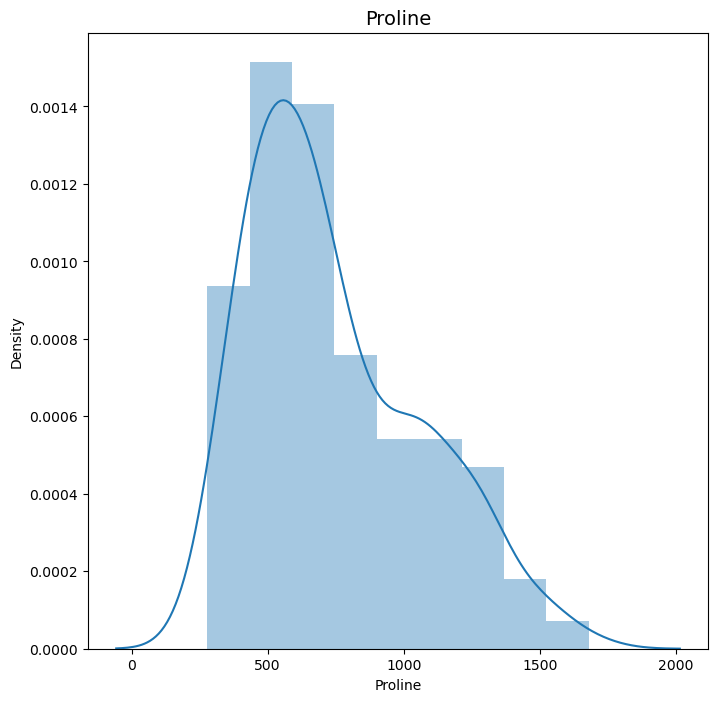

In [ ]:
#Distribution Plot
for feature in Numerical_Columns:
    if feature == "Customer_Segment": continue
    plt.figure(figsize=(8, 8))
    plt.title(feature,fontsize=14)
    sns.distplot(df[feature])
    plt.show()

Alcohol vs Malic_Acid


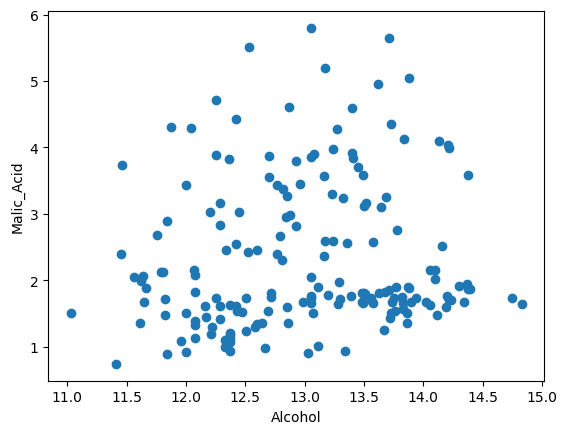



Alcohol vs Ash


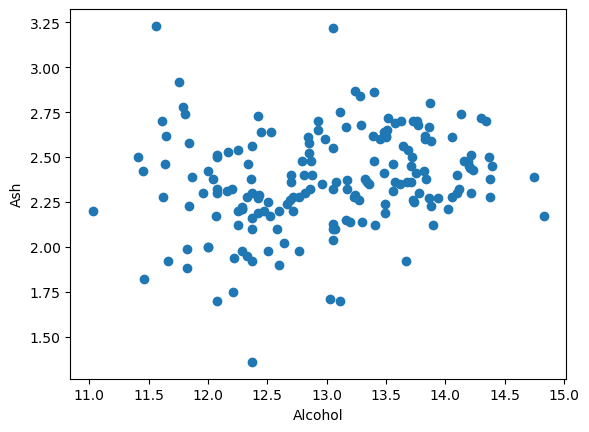



Alcohol vs Ash_Alcanity


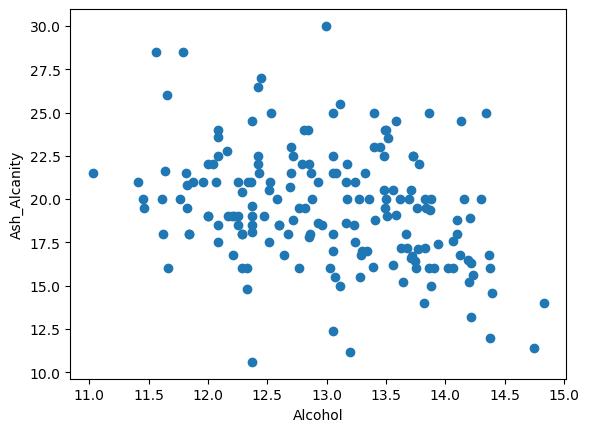



Alcohol vs Magnesium


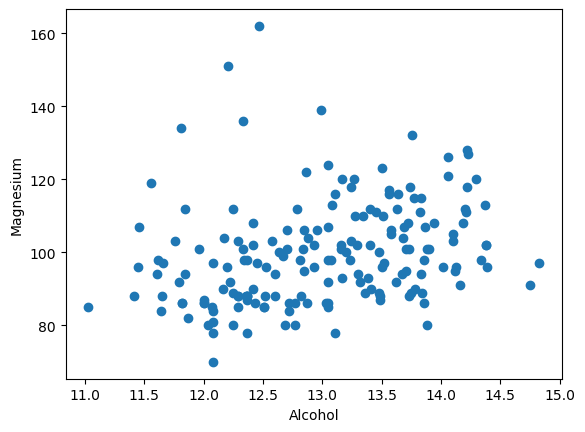



Alcohol vs Total_Phenols


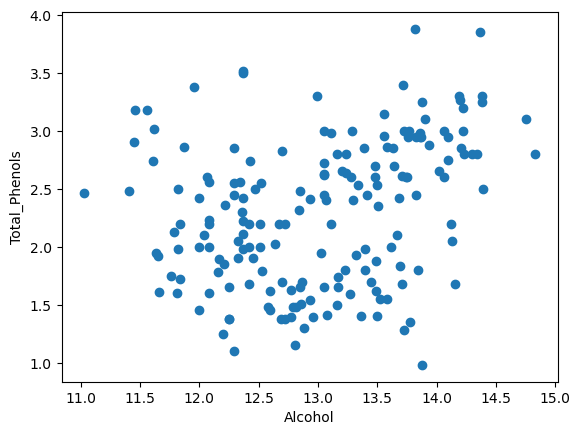



Alcohol vs Flavanoids


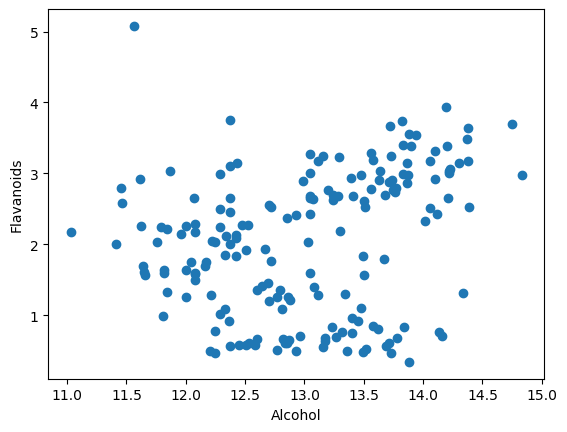



Alcohol vs Nonflavanoid_Phenols


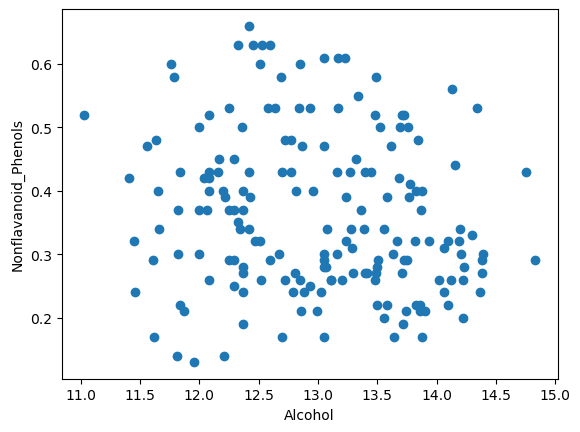



Alcohol vs Proanthocyanins


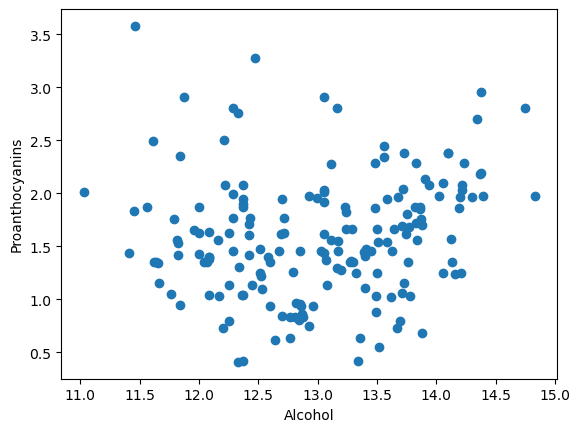



Alcohol vs Color_Intensity


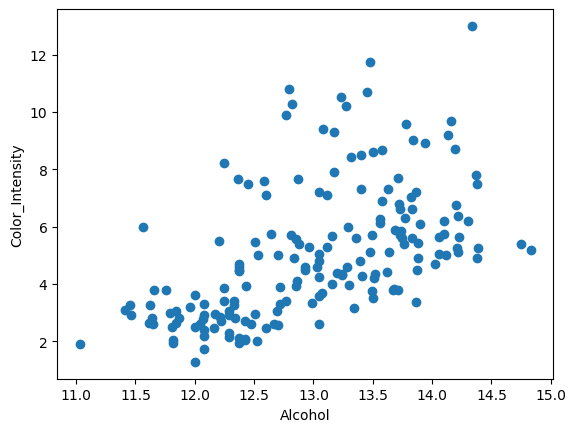



Alcohol vs Hue


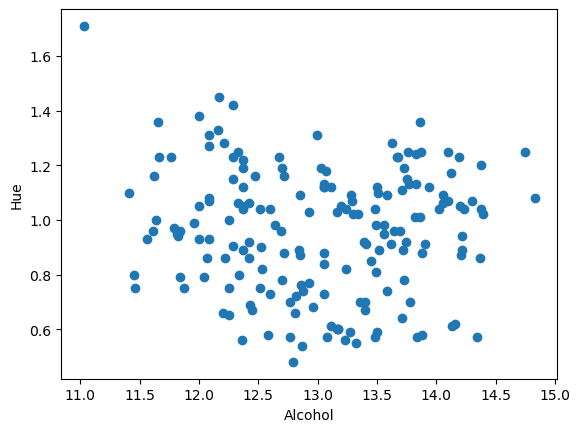



Alcohol vs OD280


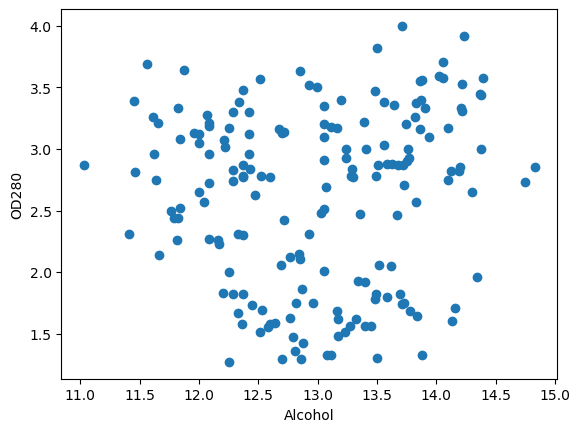



Alcohol vs Proline


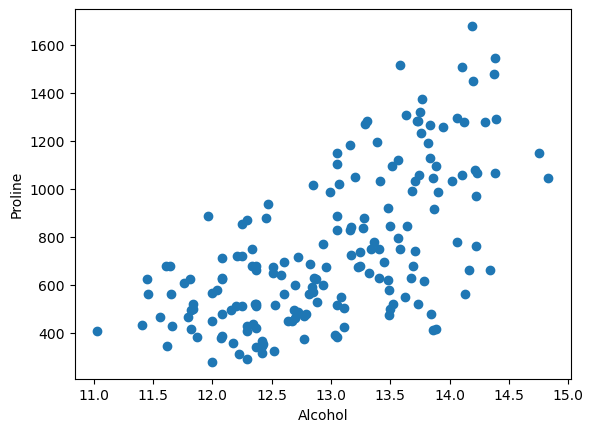



Alcohol vs Customer_Segment


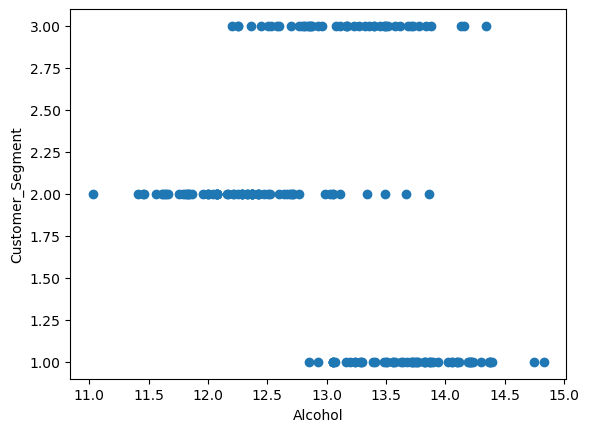



Malic_Acid vs Ash


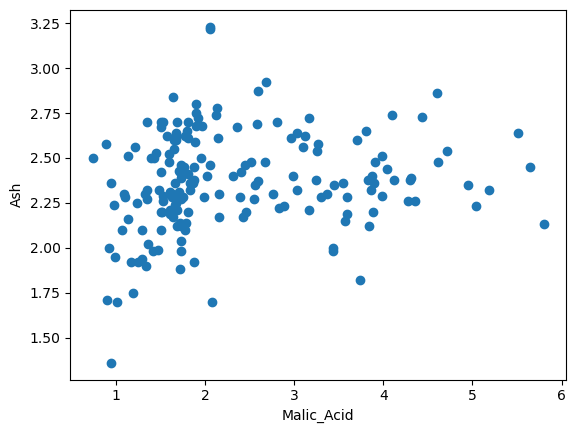



Malic_Acid vs Ash_Alcanity


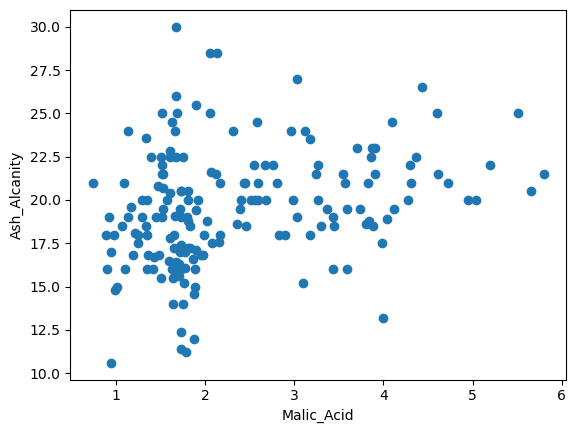



Malic_Acid vs Magnesium


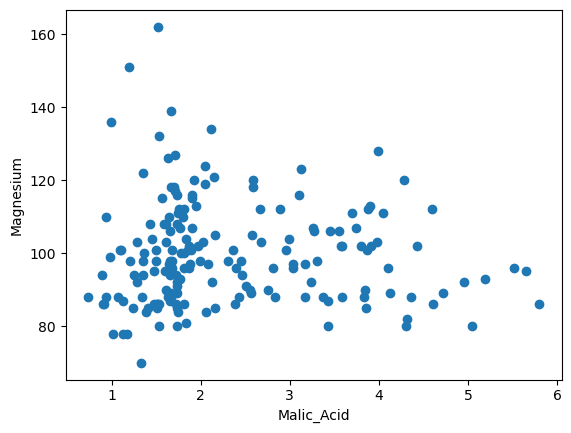



Malic_Acid vs Total_Phenols


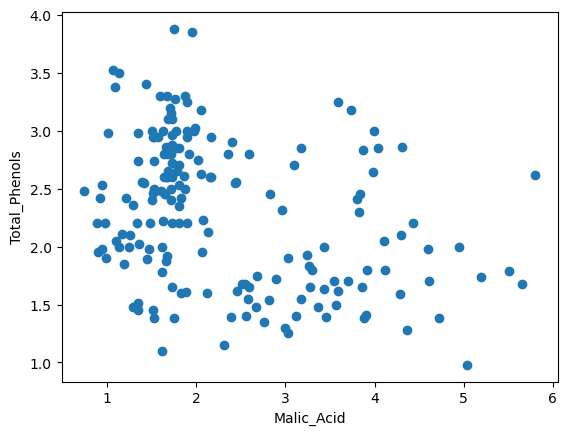



Malic_Acid vs Flavanoids


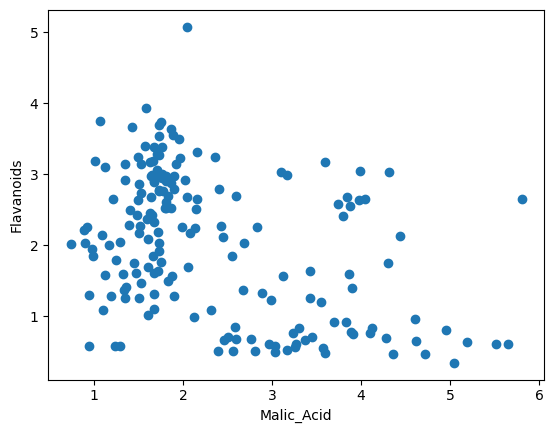



Malic_Acid vs Nonflavanoid_Phenols


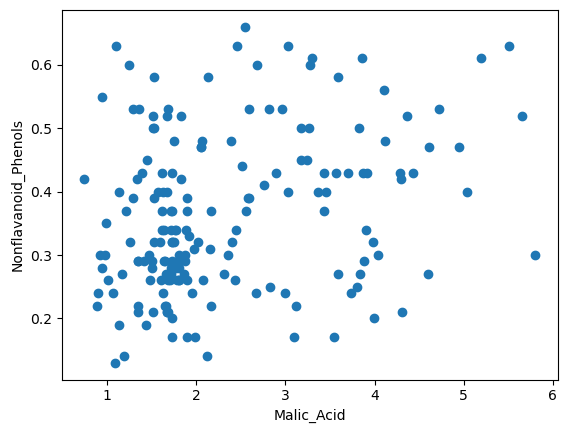



Malic_Acid vs Proanthocyanins


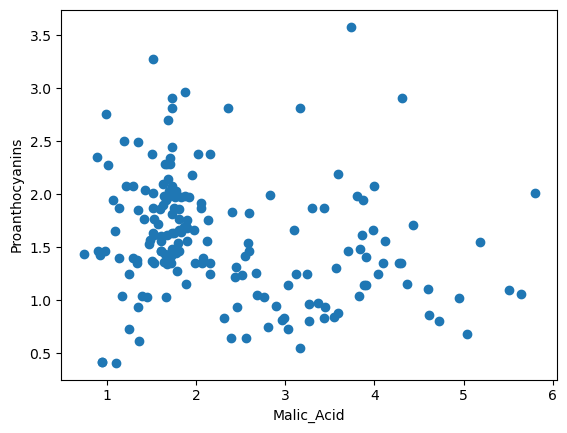



Malic_Acid vs Color_Intensity


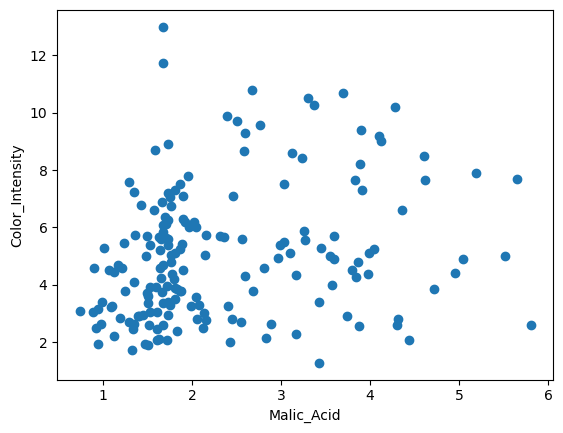



Malic_Acid vs Hue


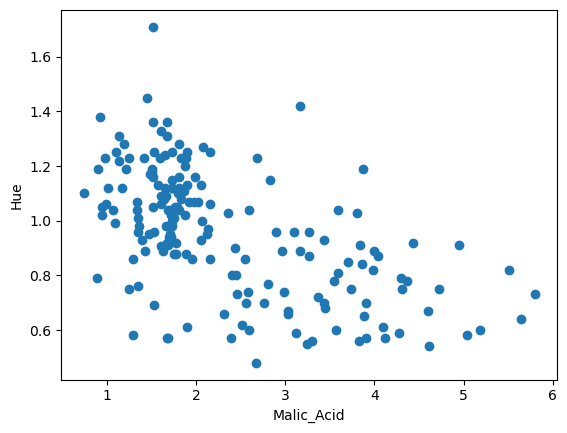



Malic_Acid vs OD280


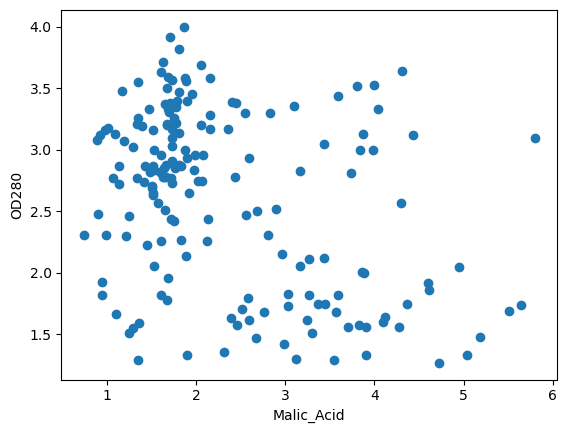



Malic_Acid vs Proline


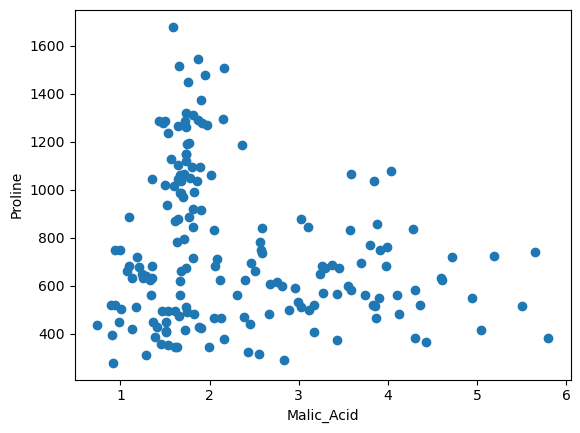



Malic_Acid vs Customer_Segment


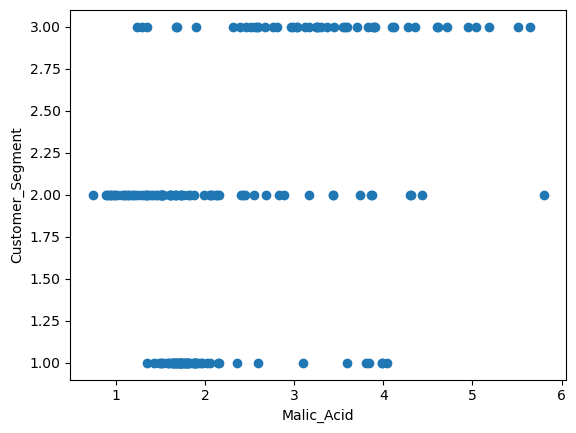



Ash vs Ash_Alcanity


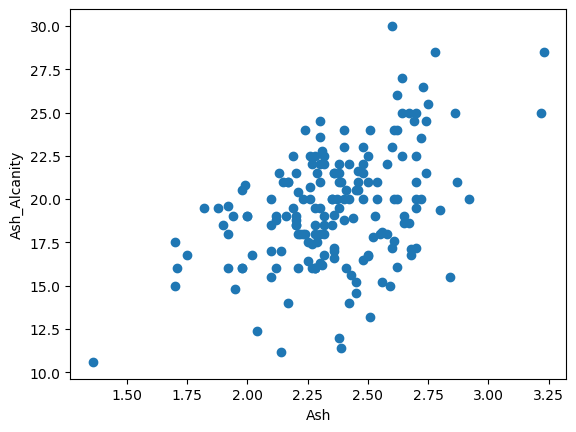



Ash vs Magnesium


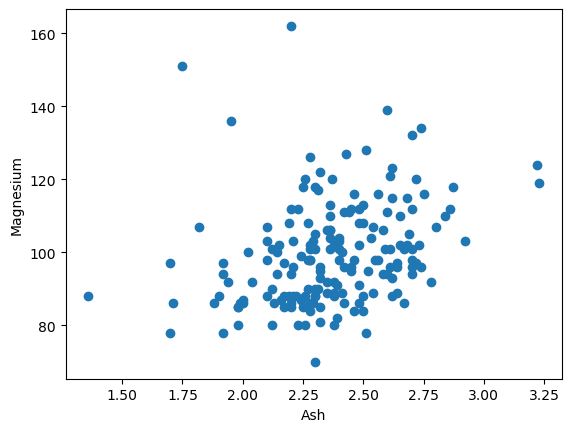



Ash vs Total_Phenols


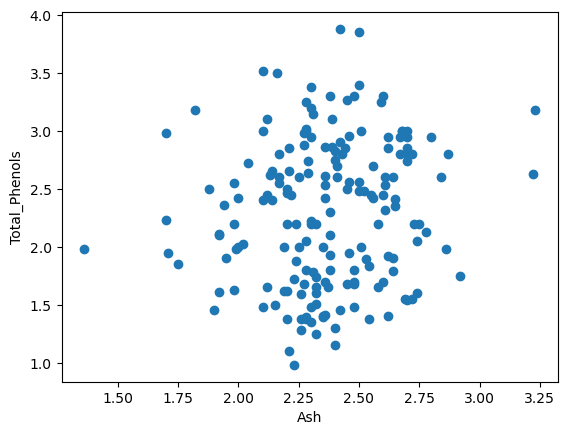



Ash vs Flavanoids


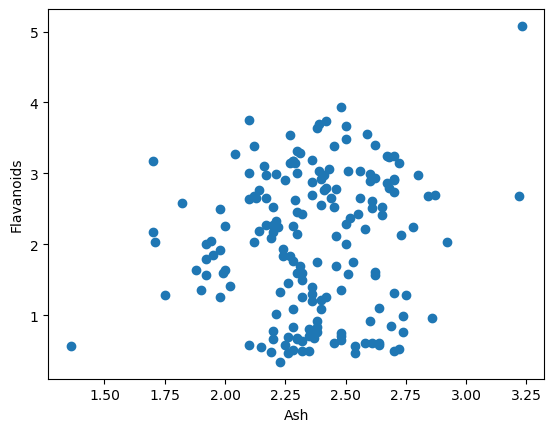



Ash vs Nonflavanoid_Phenols


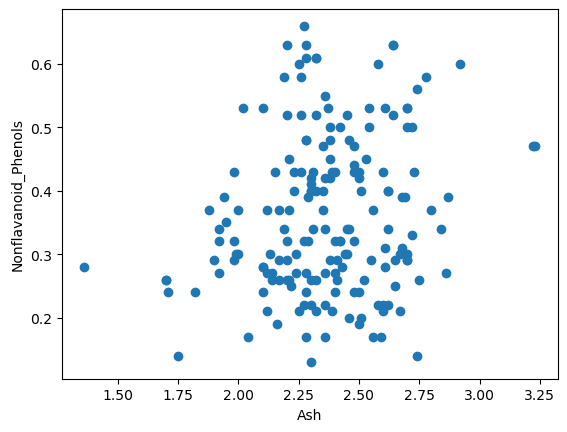



Ash vs Proanthocyanins


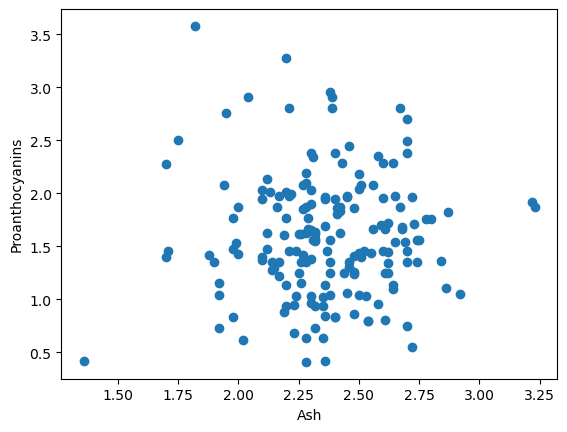



Ash vs Color_Intensity


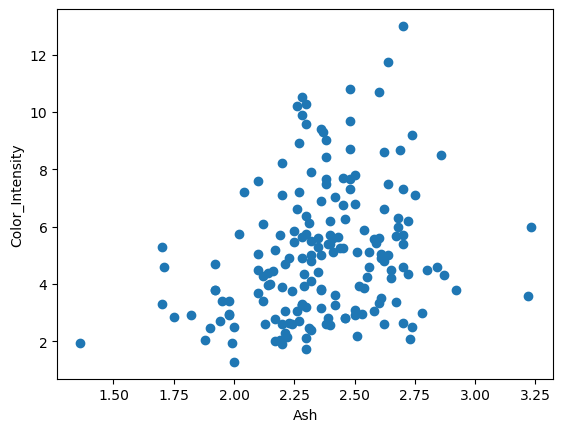



Ash vs Hue


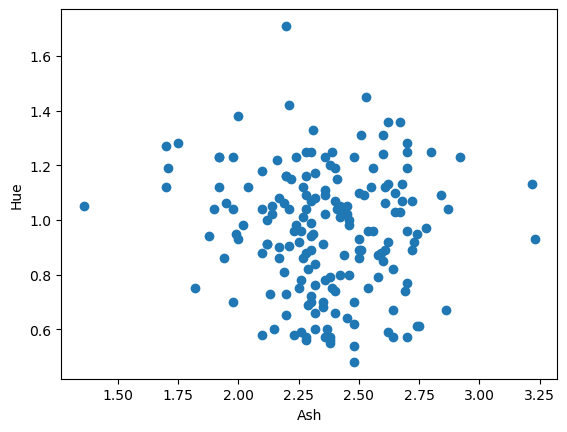



Ash vs OD280


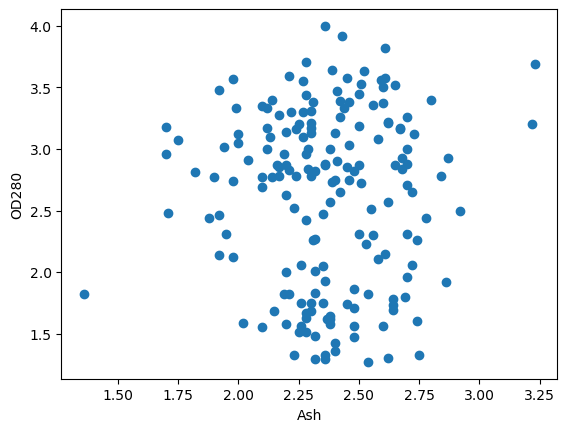



Ash vs Proline


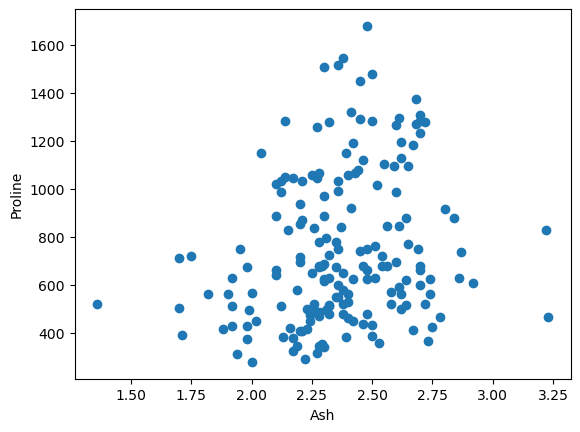



Ash vs Customer_Segment


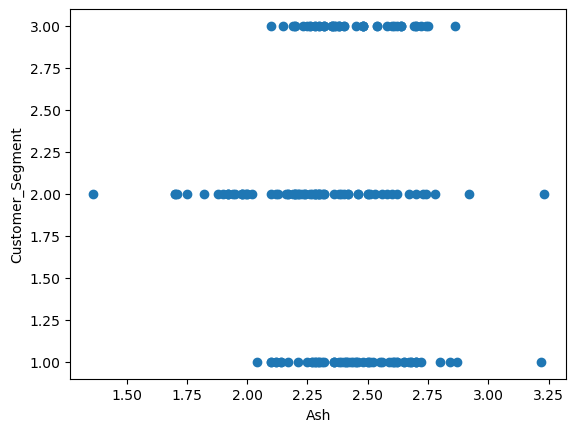



Ash_Alcanity vs Magnesium


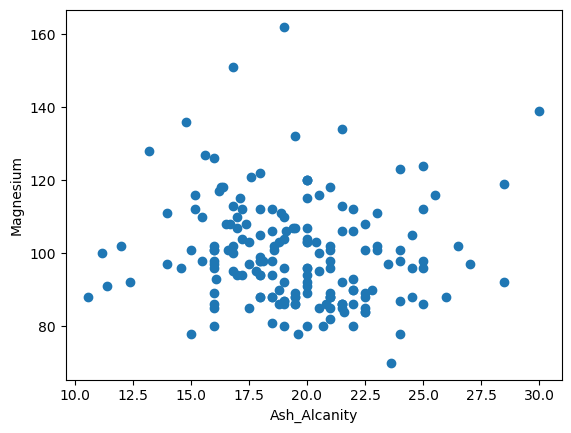



Ash_Alcanity vs Total_Phenols


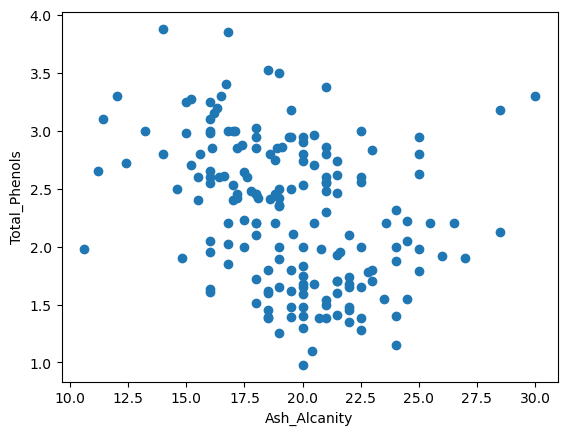



Ash_Alcanity vs Flavanoids


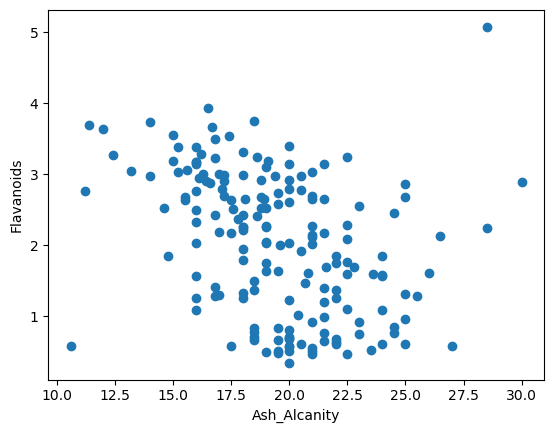



Ash_Alcanity vs Nonflavanoid_Phenols


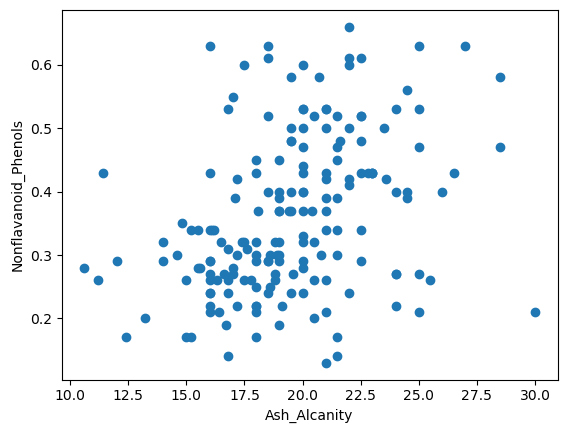



Ash_Alcanity vs Proanthocyanins


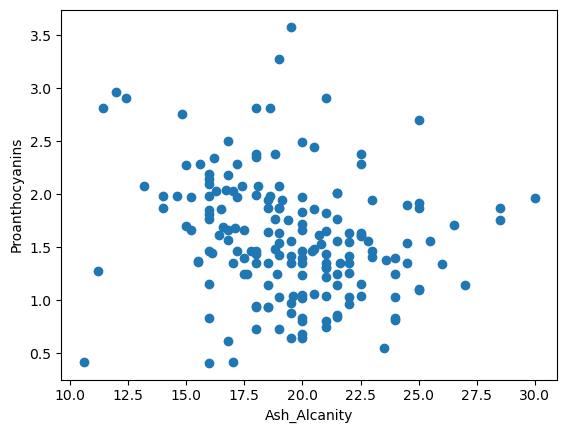



Ash_Alcanity vs Color_Intensity


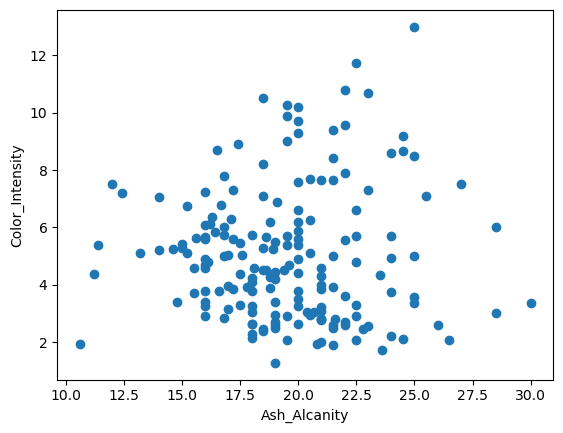



Ash_Alcanity vs Hue


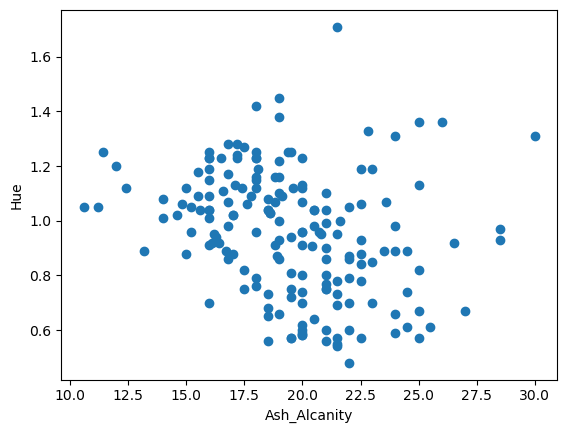



Ash_Alcanity vs OD280


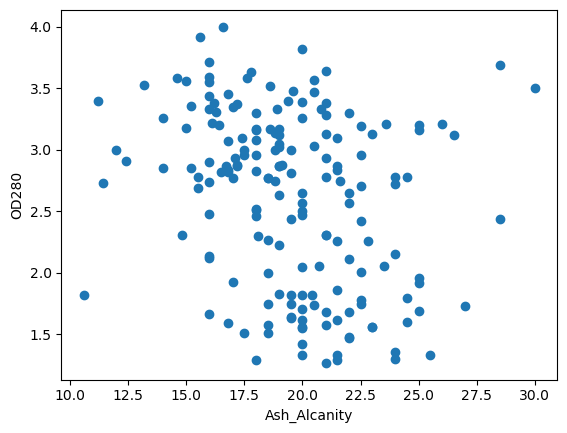



Ash_Alcanity vs Proline


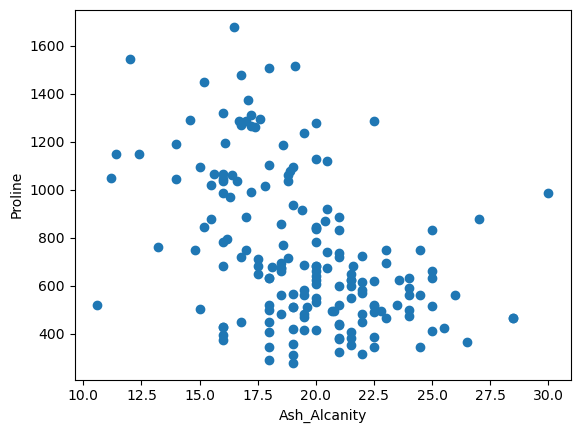



Ash_Alcanity vs Customer_Segment


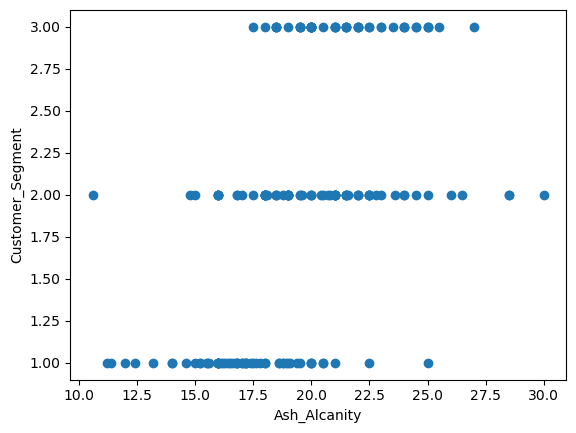



Magnesium vs Total_Phenols


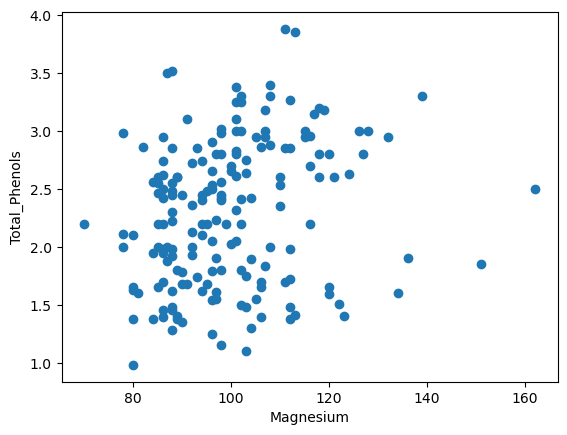



Magnesium vs Flavanoids


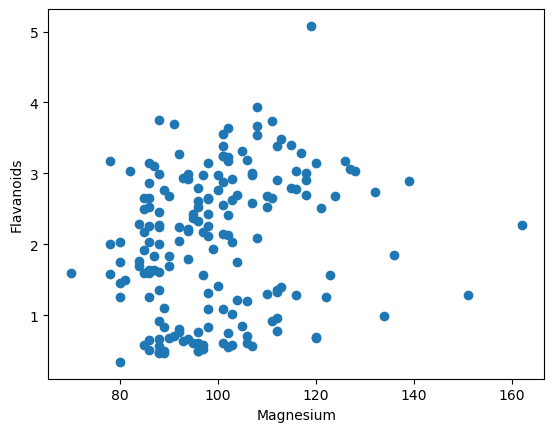



Magnesium vs Nonflavanoid_Phenols


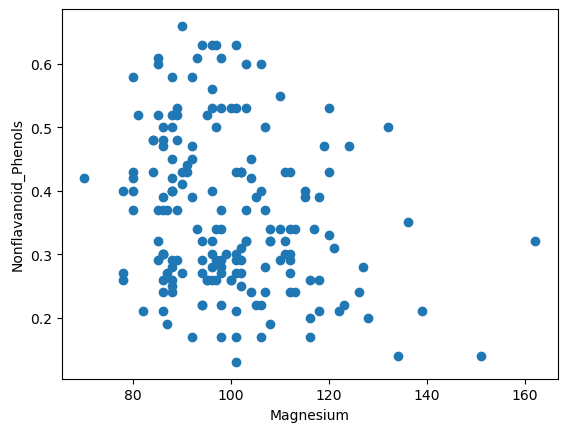



Magnesium vs Proanthocyanins


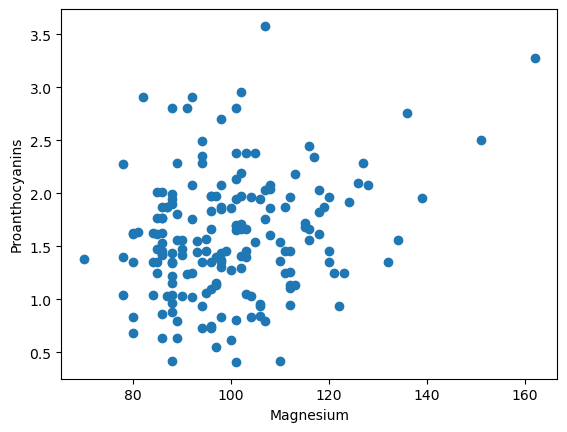



Magnesium vs Color_Intensity


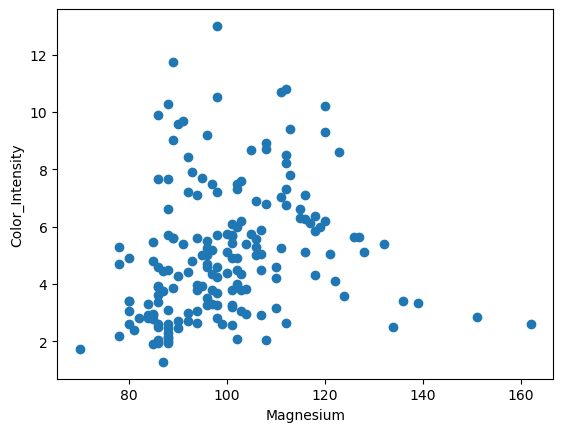



Magnesium vs Hue


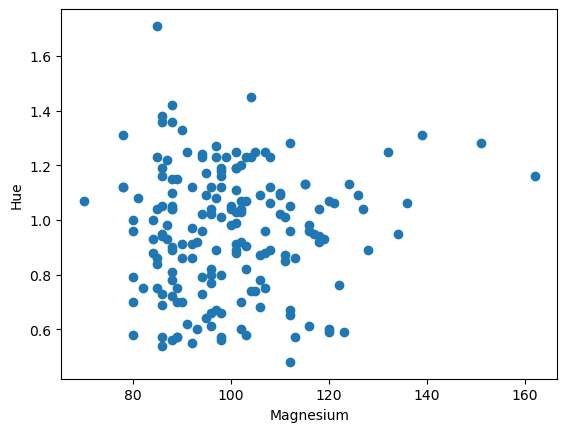



Magnesium vs OD280


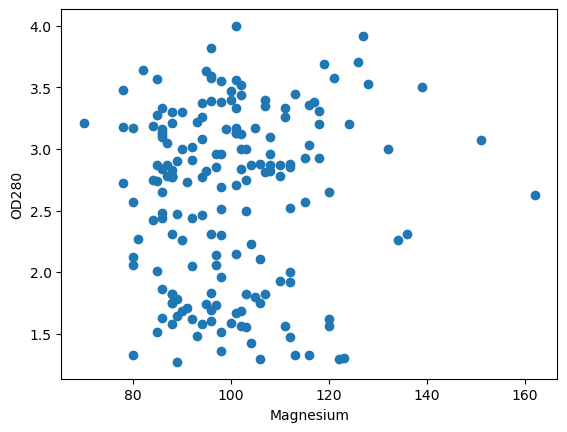



Magnesium vs Proline


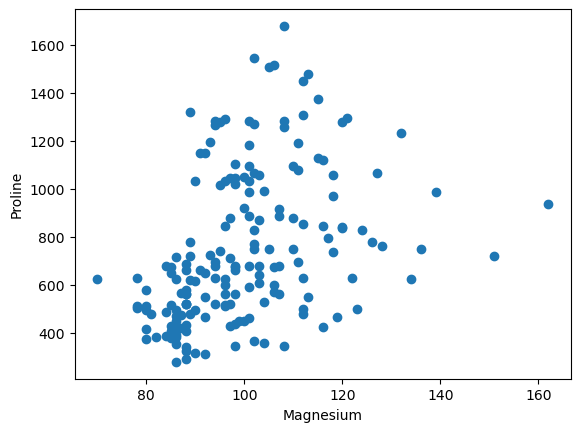



Magnesium vs Customer_Segment


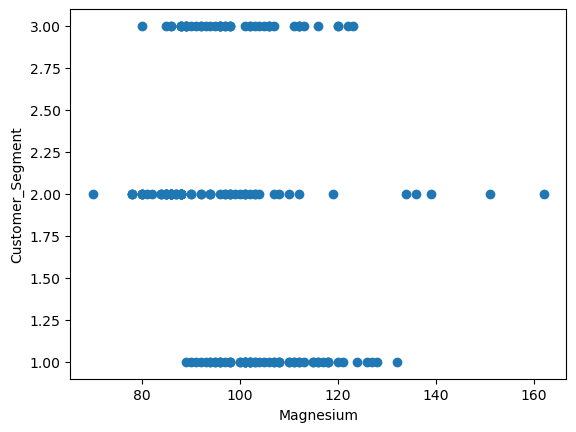



Total_Phenols vs Flavanoids


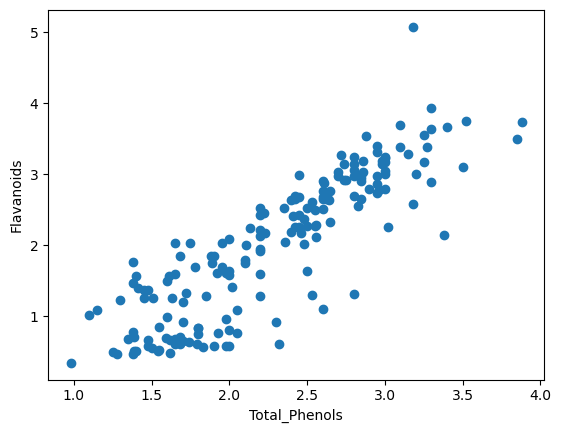



Total_Phenols vs Nonflavanoid_Phenols


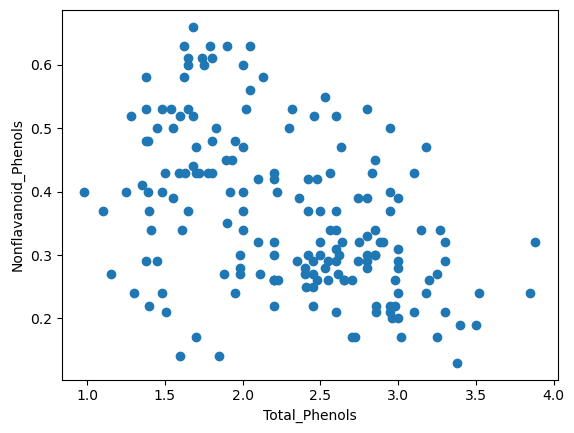



Total_Phenols vs Proanthocyanins


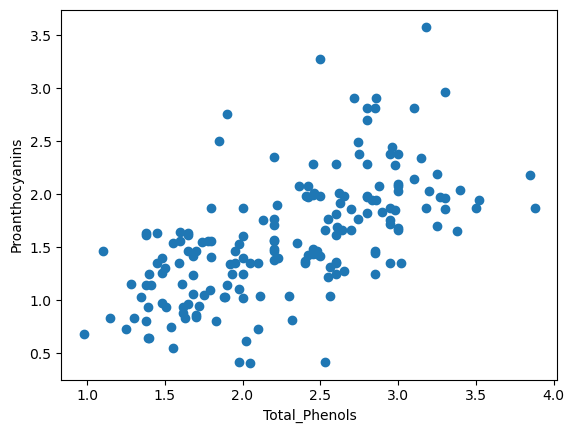



Total_Phenols vs Color_Intensity


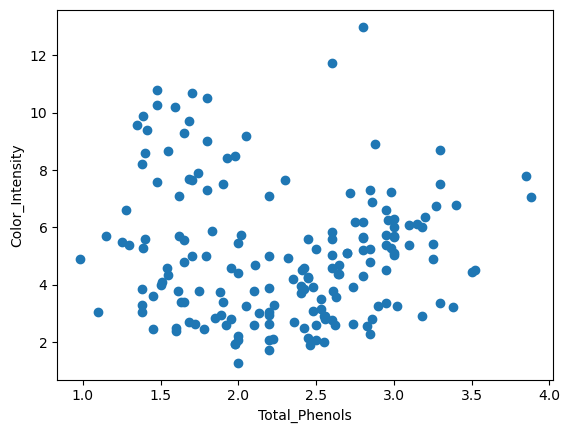



Total_Phenols vs Hue


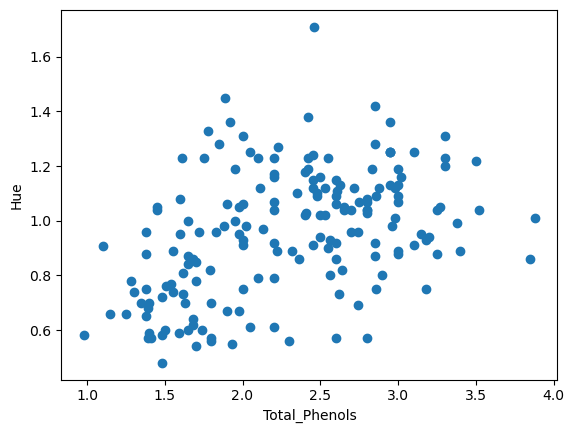



Total_Phenols vs OD280


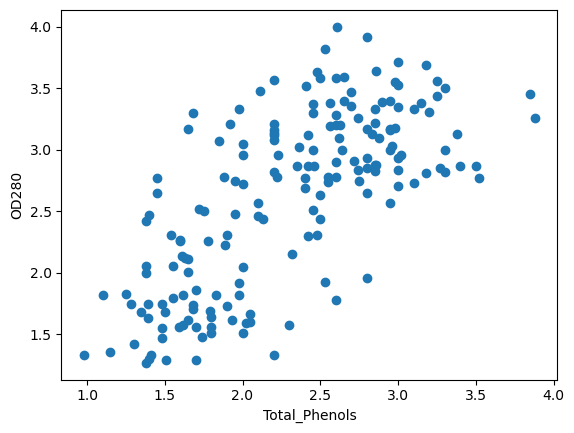



Total_Phenols vs Proline


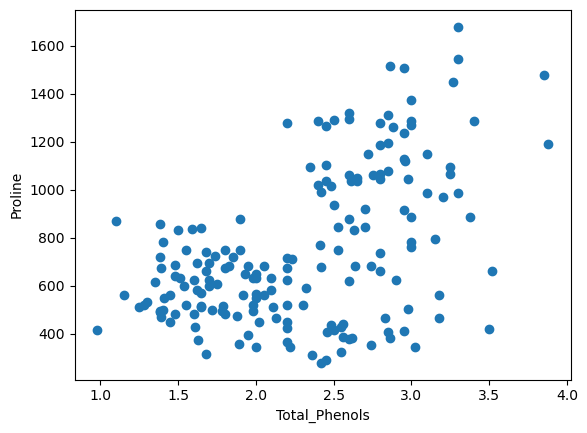



Total_Phenols vs Customer_Segment


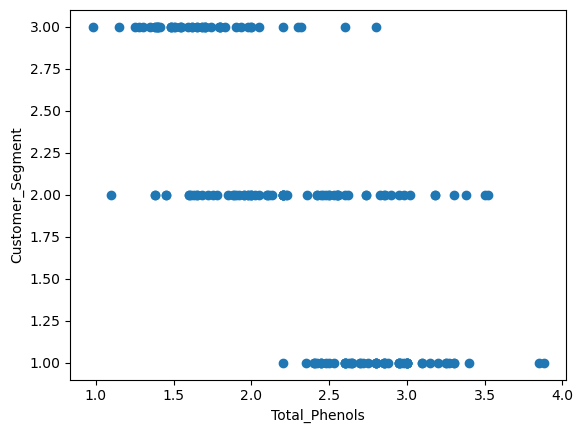



Flavanoids vs Nonflavanoid_Phenols


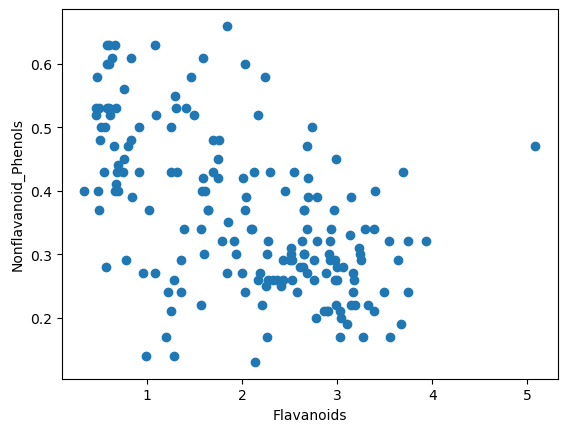



Flavanoids vs Proanthocyanins


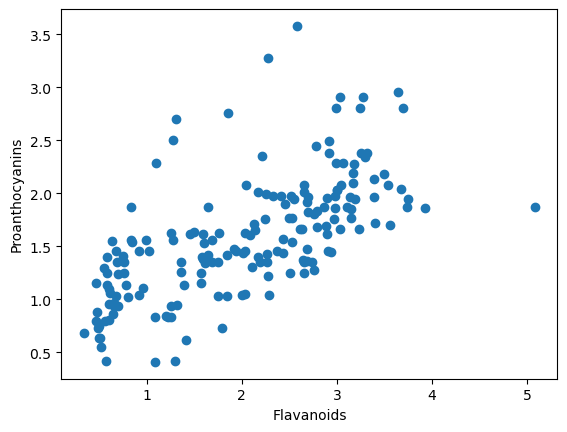



Flavanoids vs Color_Intensity


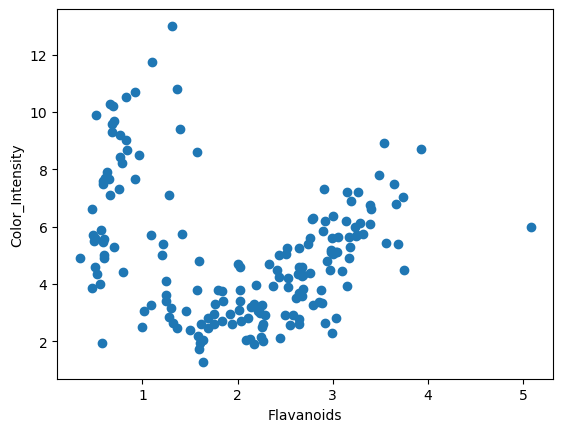



Flavanoids vs Hue


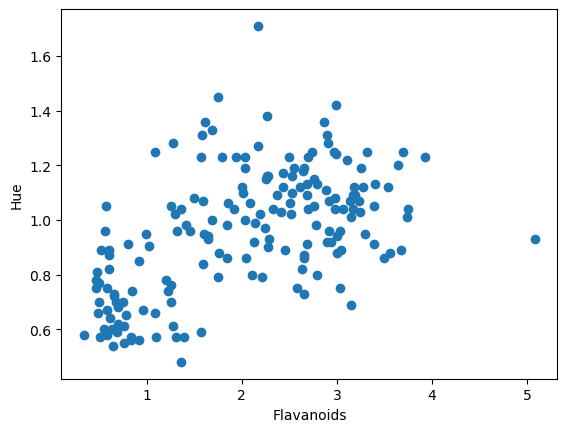



Flavanoids vs OD280


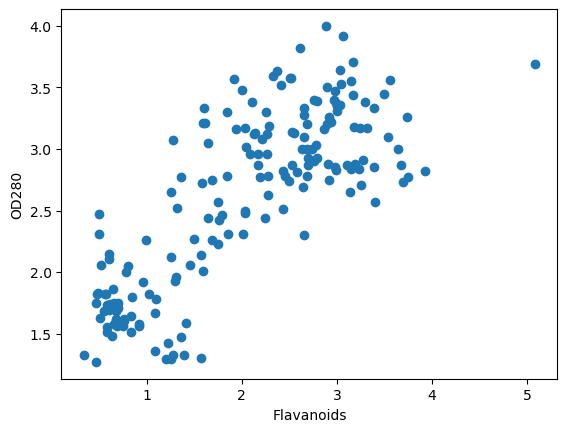



Flavanoids vs Proline


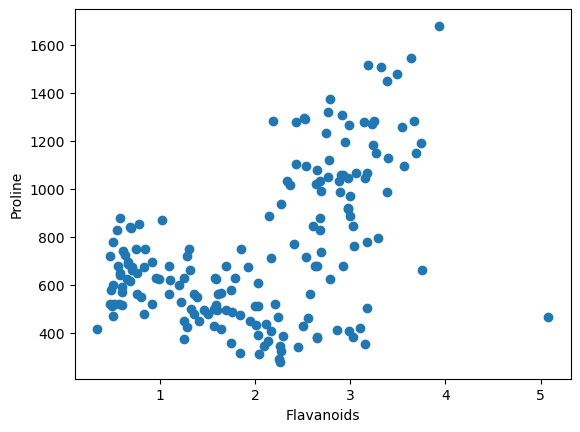



Flavanoids vs Customer_Segment


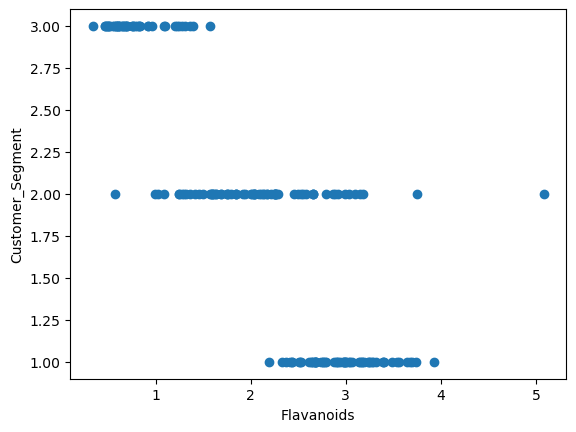



Nonflavanoid_Phenols vs Proanthocyanins


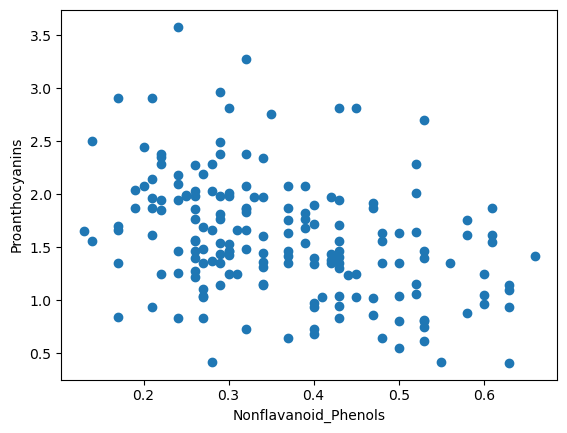



Nonflavanoid_Phenols vs Color_Intensity


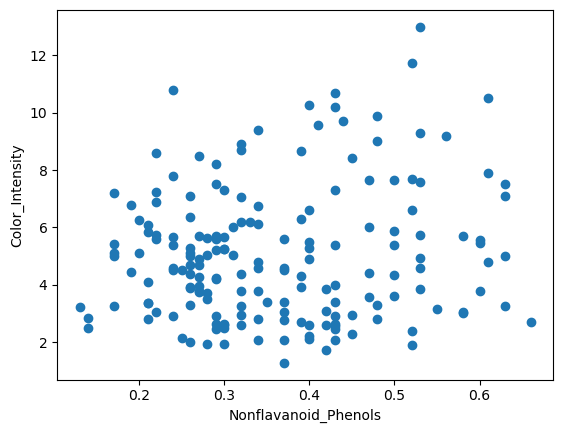



Nonflavanoid_Phenols vs Hue


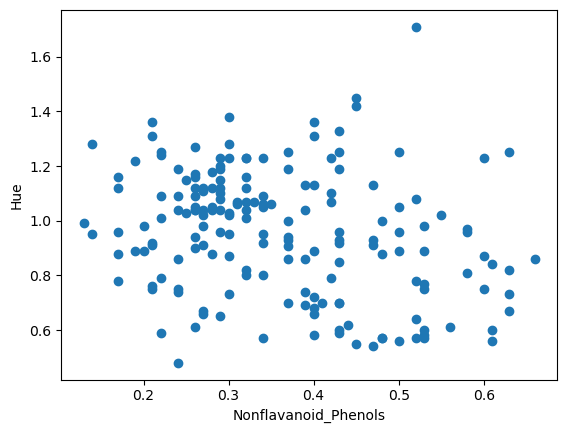



Nonflavanoid_Phenols vs OD280


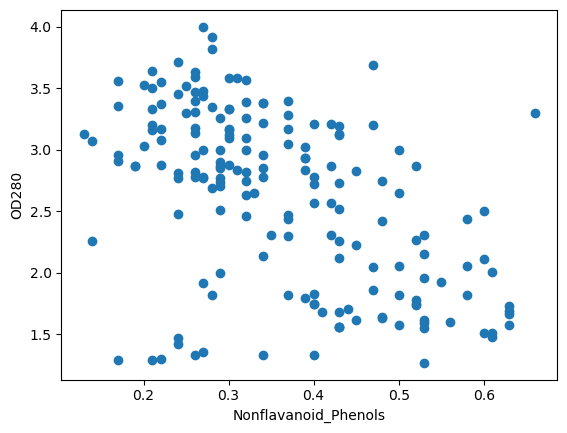



Nonflavanoid_Phenols vs Proline


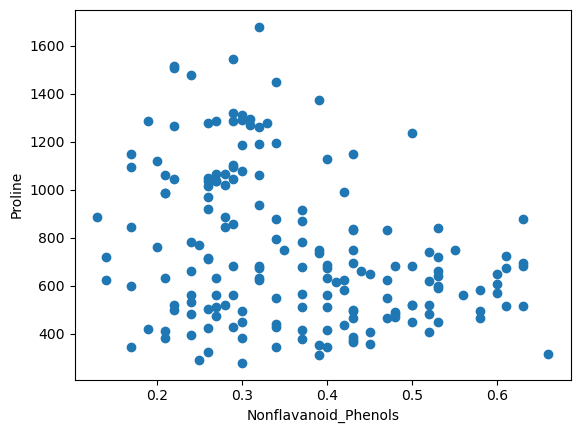



Nonflavanoid_Phenols vs Customer_Segment


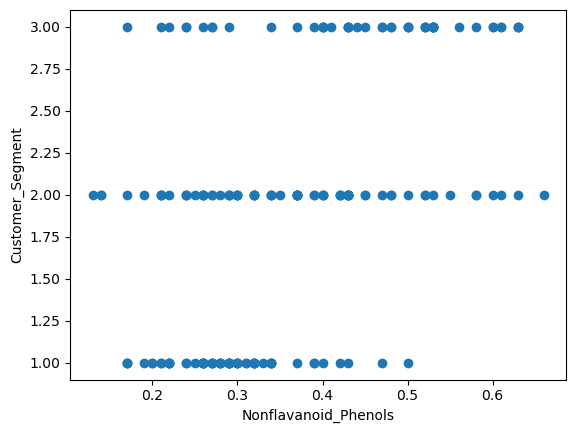



Proanthocyanins vs Color_Intensity


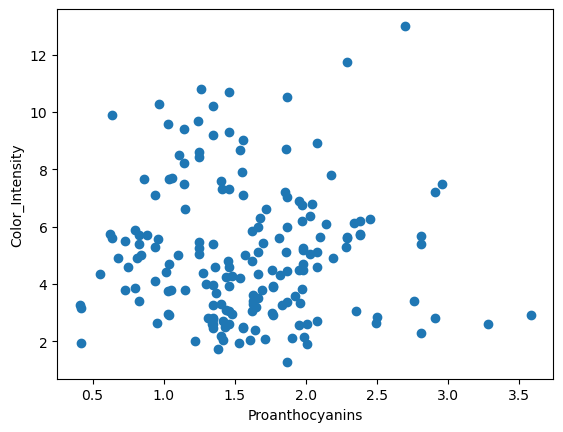



Proanthocyanins vs Hue


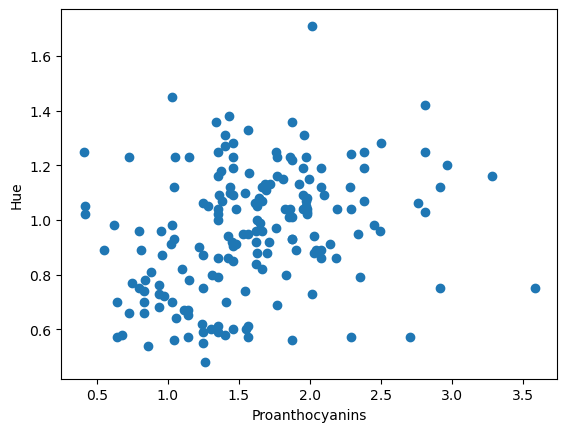



Proanthocyanins vs OD280


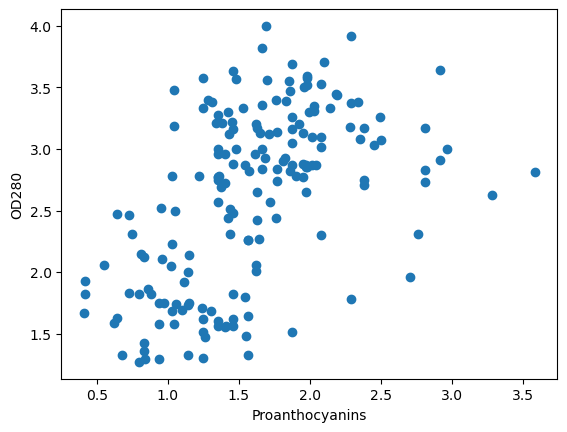



Proanthocyanins vs Proline


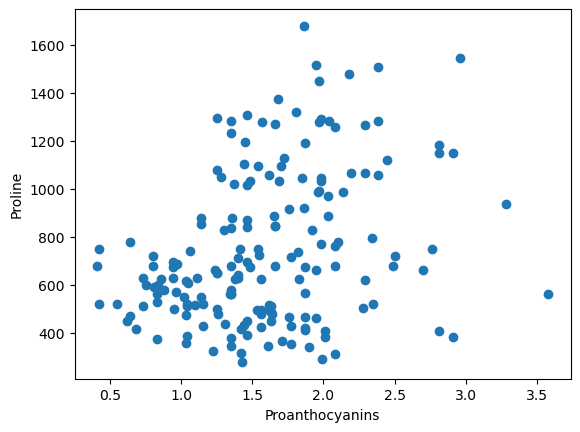



Proanthocyanins vs Customer_Segment


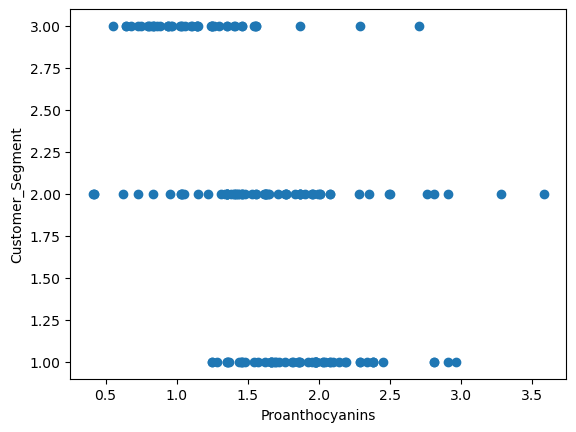



Color_Intensity vs Hue


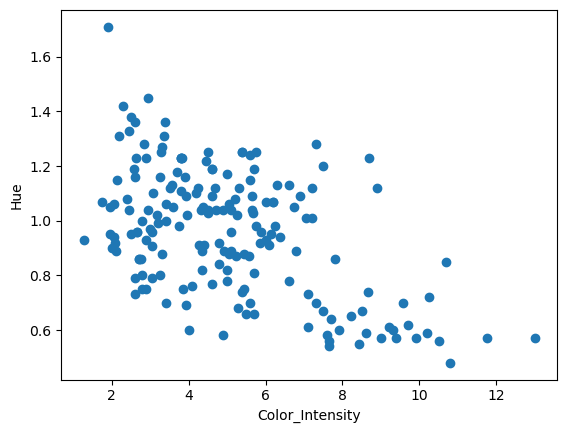



Color_Intensity vs OD280


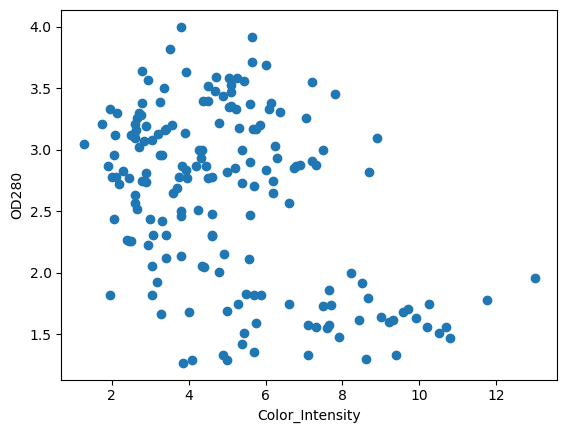



Color_Intensity vs Proline


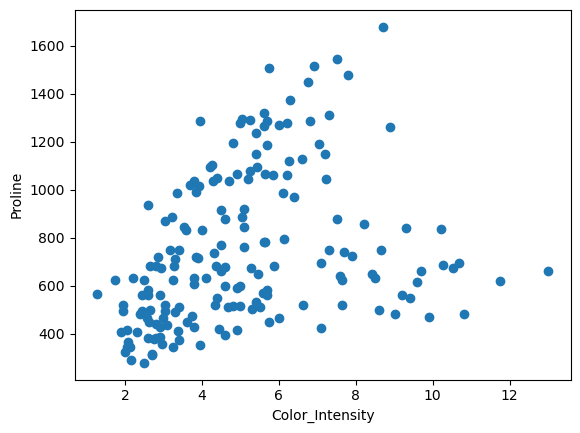



Color_Intensity vs Customer_Segment


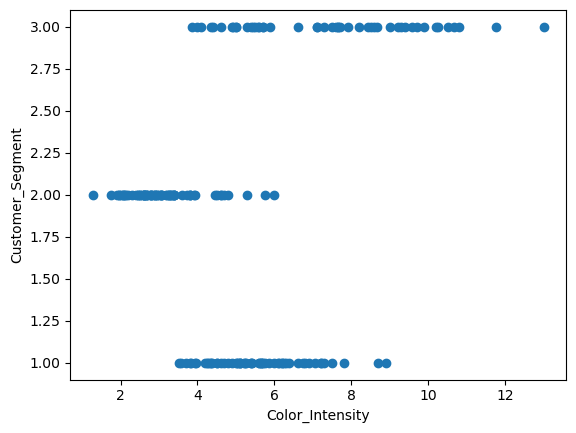



Hue vs OD280


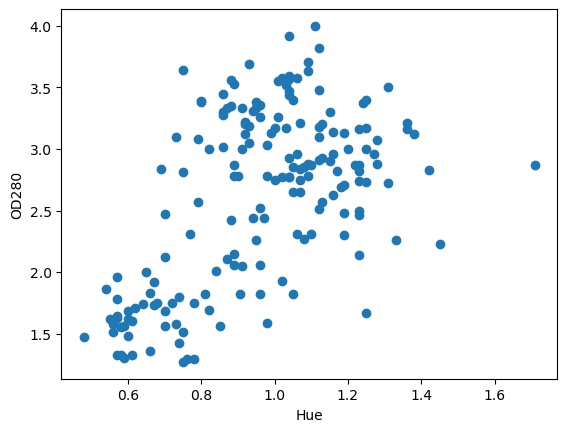



Hue vs Proline


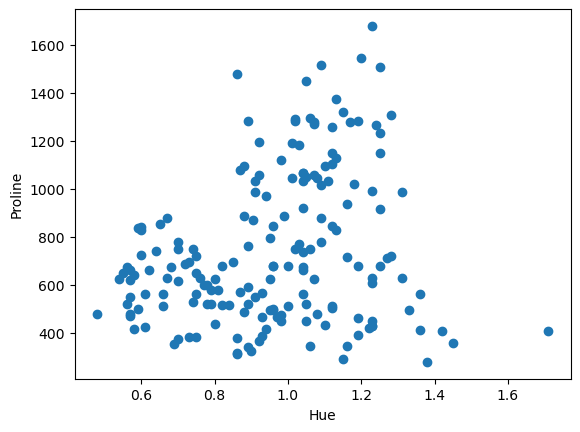



Hue vs Customer_Segment


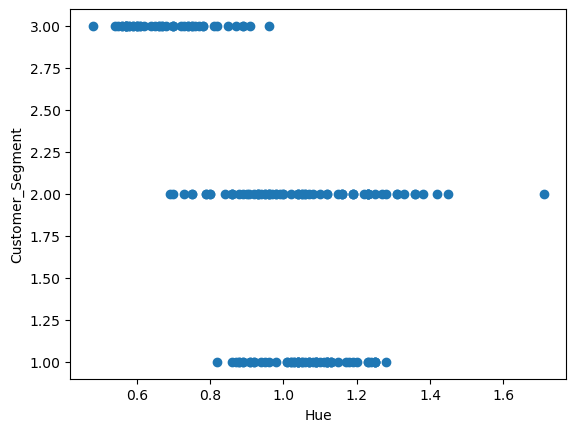



OD280 vs Proline


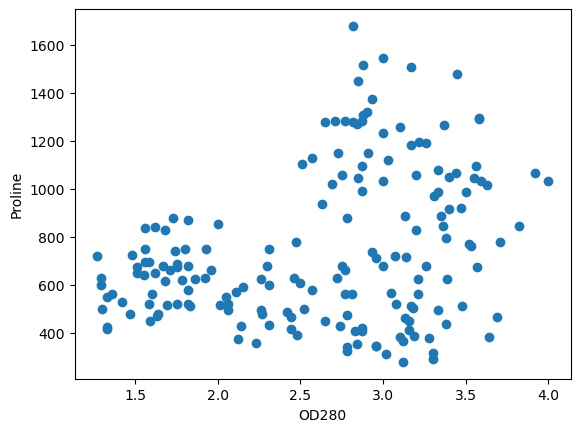



OD280 vs Customer_Segment


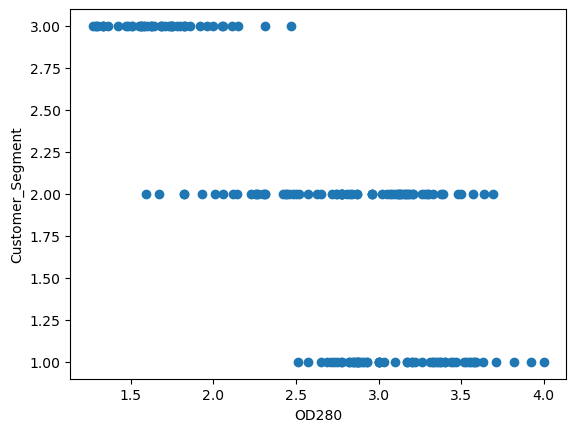



Proline vs Customer_Segment


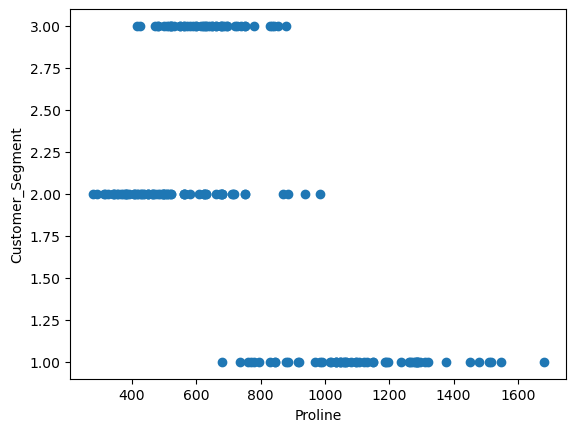

In [ ]:
# Scatter Plot
# For each pair of numerical variables, construct a scatter plot of the variables.
temp = []
for i in Numerical_Columns:
  for j in Numerical_Columns:
    if (i == j): continue
    temp.append(i)
    if (j in temp): continue
    print(i, "vs", j)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.scatter(x=df[i], y=df[j])
    plt.show()
    print("\n")

<AxesSubplot:>

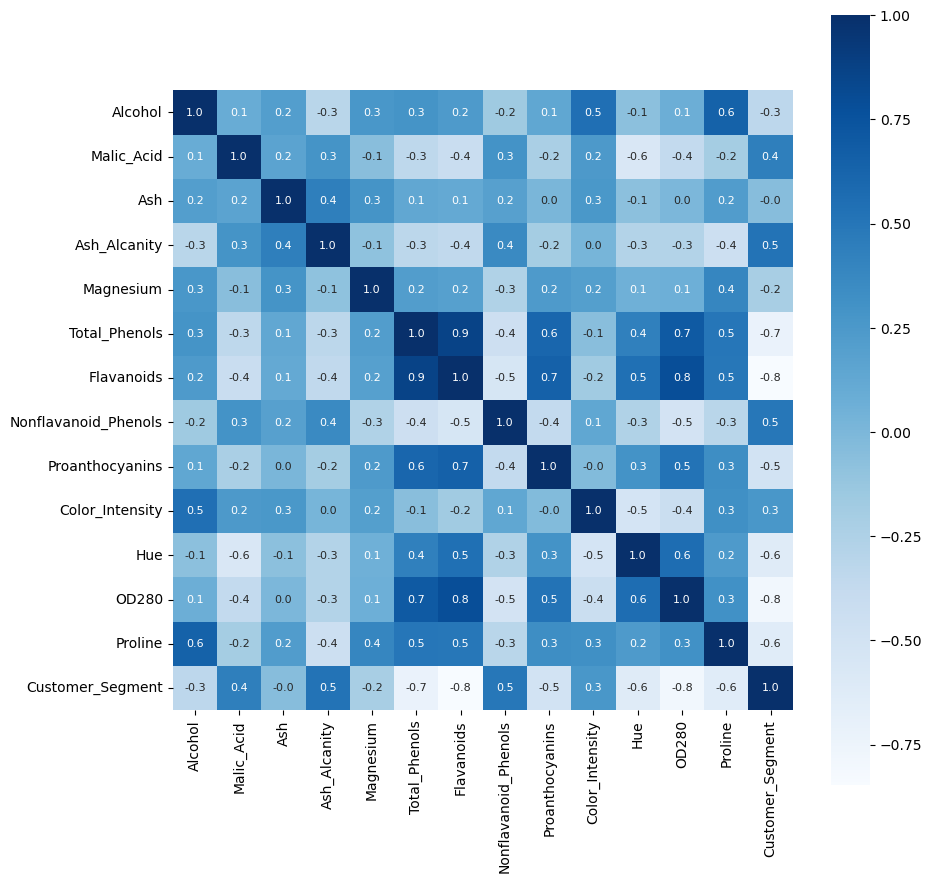

In [ ]:
# Correlation
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**<font face="Lato" size=5 color=red>3. Processing missing values and/or outliers</font>**


In [ ]:
# Checking Null values
print(df.isnull().any())
print("\n")
print(df.isnull().sum())

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
Customer_Segment        False
dtype: bool


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


**<font face="Lato" size=4 color=orange>3.1 Boxplot</font>**


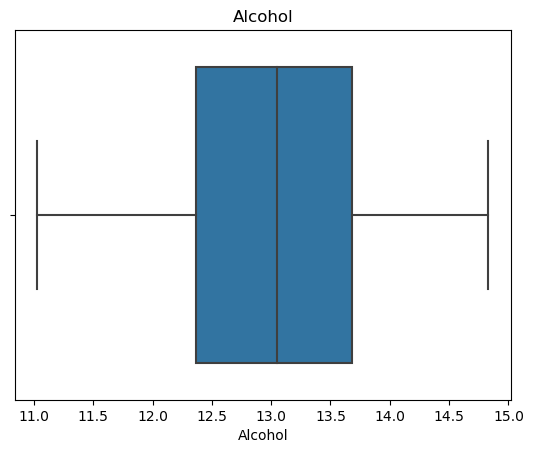

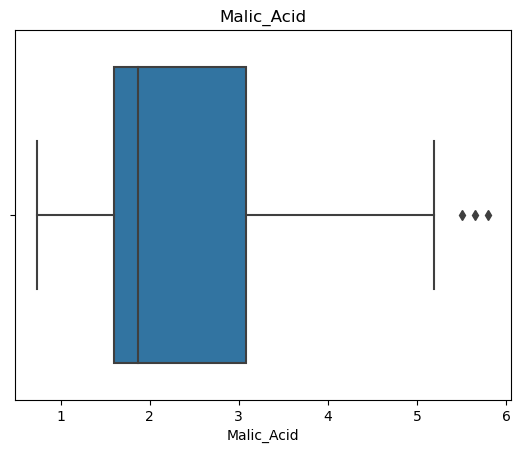

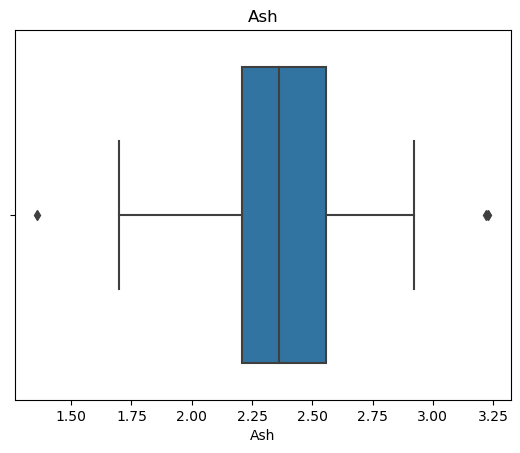

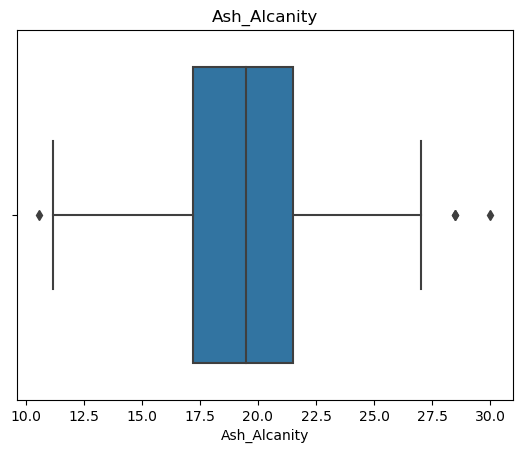

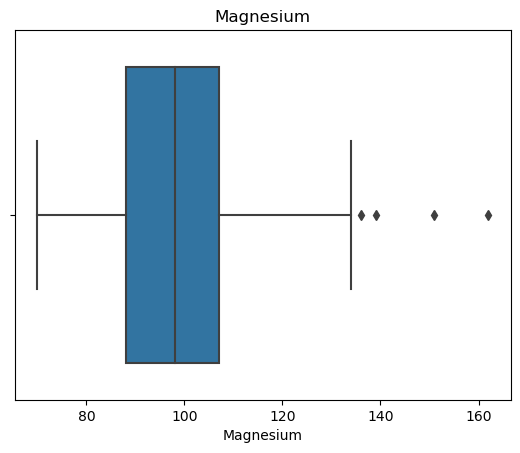

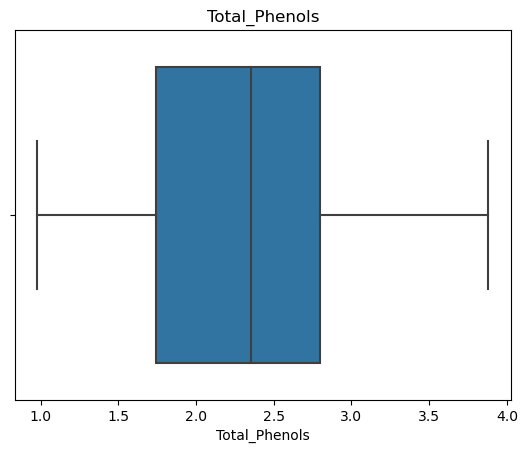

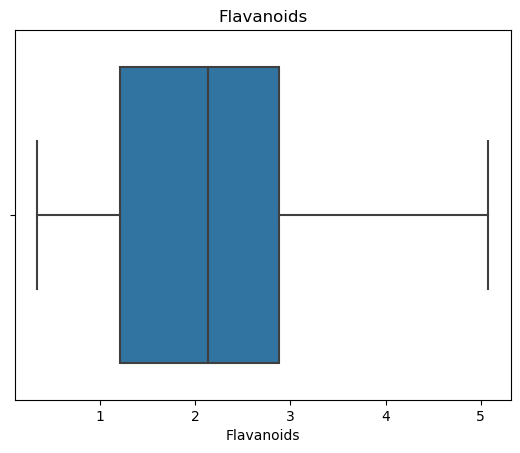

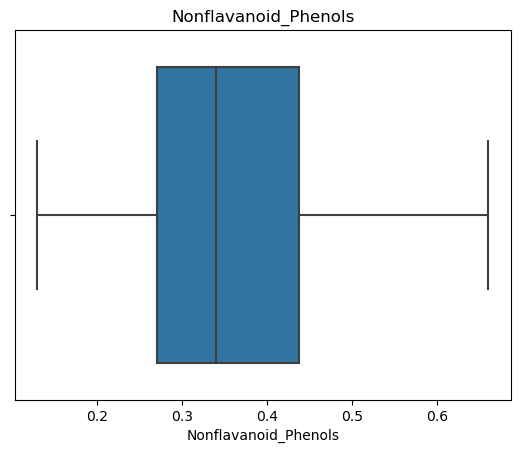

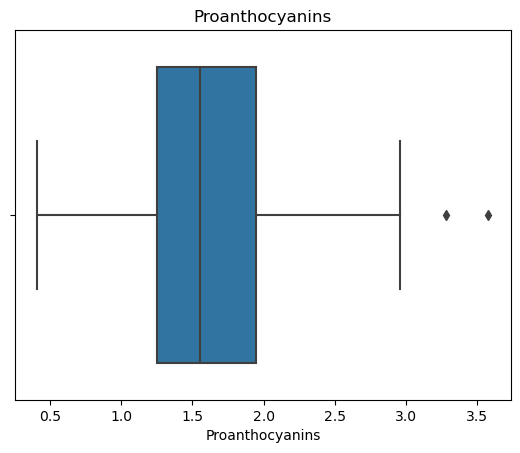

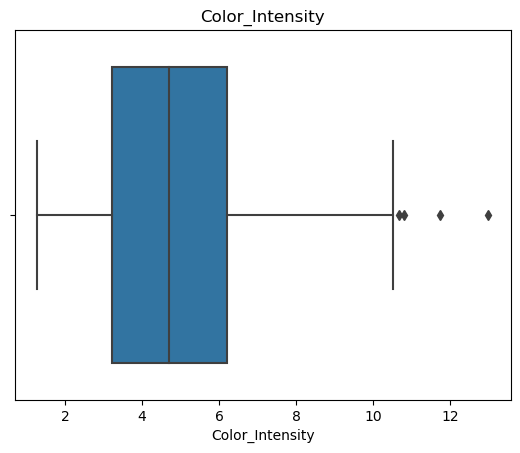

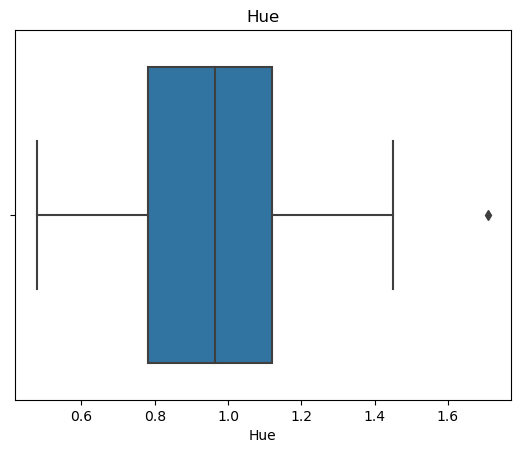

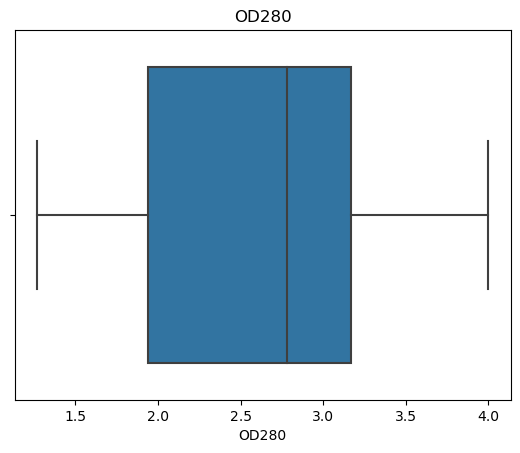

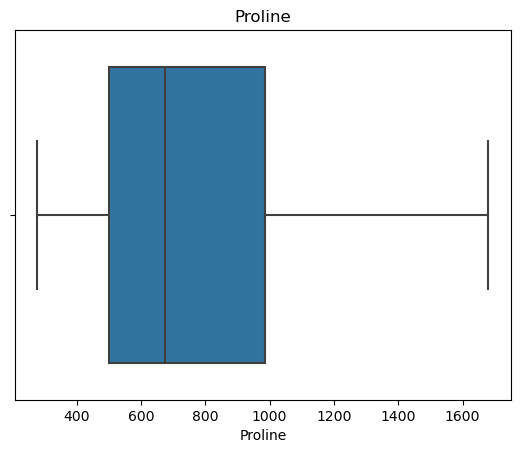

In [ ]:
# Using Box Plot to see Outliers
for feature in Numerical_Columns:
    if feature == "Customer_Segment": continue
    plt.title(feature,fontsize=12)
    sns.boxplot(df[feature])
    plt.show()

Columns with outliers:
- Malic_Acid
- Ash
- Ash_Alcanity
- Magnesium
- Proanthocyanins
- Color_Intensity
- Hue

**<font face="Lato" size=4 color=orange>Outliers Treatment</font>**

**Flooring And Capping method**

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

Reference: https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

This code below is performing outlier detection and treatment on a DataFrame column. Outliers are data points that are significantly different from the rest of the data and may distort statistical analysis or modeling results. The code is using the Interquartile Range (IQR) method to identify and handle outliers.

Here's a step-by-step explanation of what the code does:

Q1 = df[Feature].quantile(0.25): Calculates the first quartile (25th percentile) of the Feature column. This value represents the data point below which 25% of the data falls.

Q3 = df[Feature].quantile(0.75): Calculates the third quartile (75th percentile) of the Feature column. This value represents the data point below which 75% of the data falls.

IQR = Q3 - Q1: Calculates the Interquartile Range (IQR), which is the range between the first and third quartiles. It represents the spread of the middle 50% of the data.

whisker_width = 1.5: Defines a multiplier (whisker width) to determine the threshold for identifying outliers. This is a common value used in the IQR method; data points outside of this range will be considered potential outliers.

lower_whisker = Q1 - (whisker_width * IQR): Calculates the lower whisker boundary below which data points are considered potential outliers.

upper_whisker = Q3 + (whisker_width * IQR): Calculates the upper whisker boundary above which data points are considered potential outliers.

df[Feature] = np.where(df[Feature] > upper_whisker, upper_whisker, np.where(df[Feature] < lower_whisker, lower_whisker, df[Feature])):
        
        This line applies outlier treatment to the Feature column in the DataFrame.
        - It uses nested np.where functions to replace outliers with the respective whisker boundary values.
        - If a value in the Feature column is greater than the upper whisker boundary, it is replaced with the upper whisker value.
        - If a value in the Feature column is less than the lower whisker boundary, it is replaced with the lower whisker value.
        - If a value is within the whisker boundaries, it remains unchanged.

The overall effect of this code is to cap the extreme values in the Feature column by replacing them with the upper or lower whisker boundaries, which helps in reducing the impact of outliers on subsequent analysis or modeling.

In [ ]:
df_clean = df.copy() #backup

for feature in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']:

    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)

    df_clean[feature] = np.where(df_clean[feature] > upper_whisker, upper_whisker, np.where(df_clean[feature] <lower_whisker, lower_whisker, df_clean[feature]))

# The last line applies outlier treatment to the 'Feature' column in the DataFrame.
# It uses nested np.where functions to replace outliers with the respective whisker boundary values.
# If a value in the 'Feature' column is greater than the upper whisker boundary, it is replaced with the upper whisker value.
# If a value in the 'Feature' column is less than the lower whisker boundary, it is replaced with the lower whisker value.
# If a value is within the whisker boundaries, it remains unchanged.

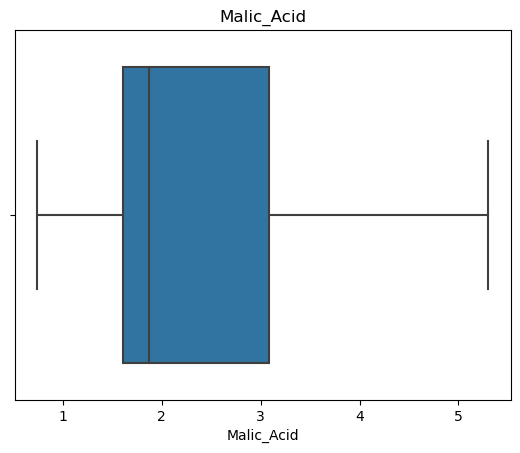

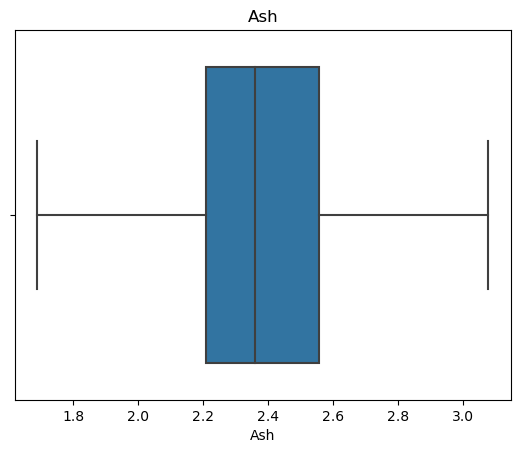

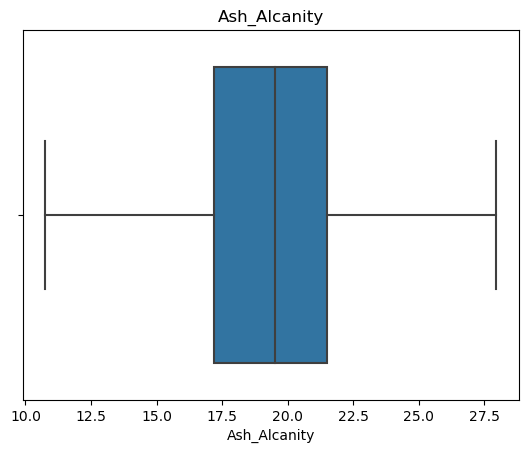

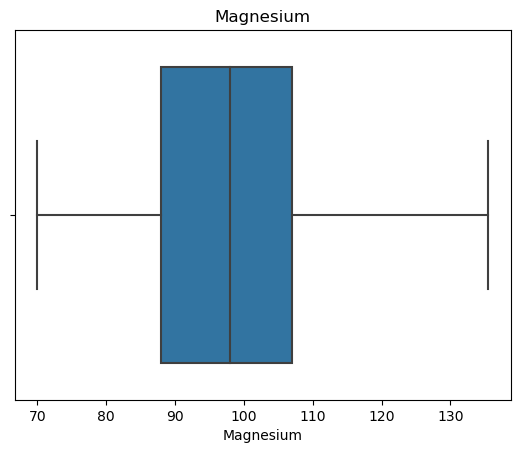

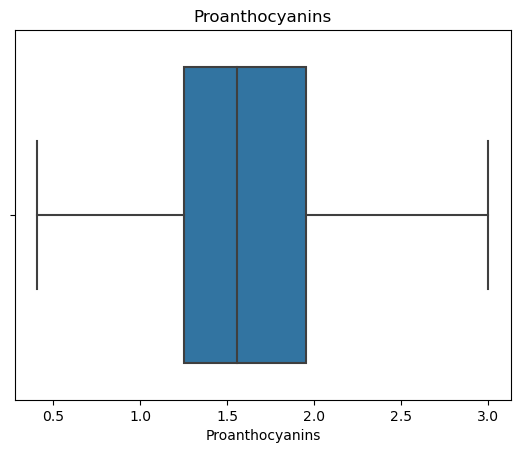

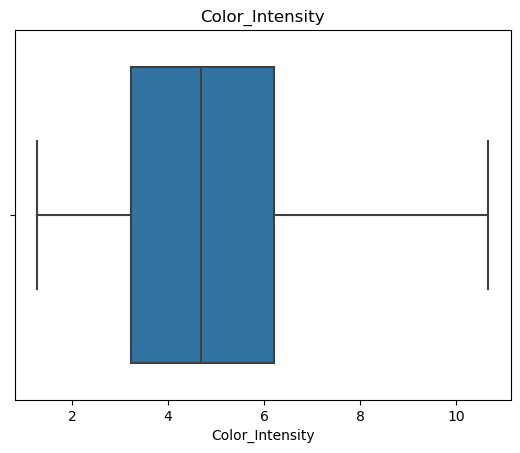

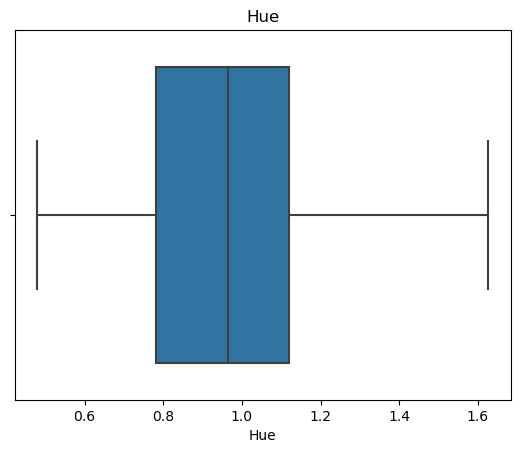

In [ ]:
# Checking whether the outliers in each features are replaced
for feature in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']:
    plt.title(feature,fontsize=12)
    sns.boxplot(df_clean[feature])
    plt.show()

In [ ]:
df.shape

(178, 14)

In [ ]:
df_clean.shape

(178, 14)

In [ ]:
for feature in df.columns:
  print("Column name:",feature)
  print(df[feature].value_counts())
  print("================")
  print()

Column name: Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

Column name: Malic_Acid
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: Malic_Acid, Length: 133, dtype: int64

Column name: Ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: Ash, Length: 79, dtype: int64

Column name: Ash_Alcanity
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: Ash_Alcanity, Length: 63, dtype: int64

Column name: Magnesium
88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118     3
104    

In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

In [ ]:
df_clean.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.330435    2.366721     19.478090   99.483146   
std      0.811827    1.100173    0.263705      3.287757   13.414186   
min     11.030000    0.740000    1.688750     10.750000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.302500    3.078750     27.950000  135.500000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.586067   
std         0.625851    0.998859              0.124453         0.558153   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.000000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.038146    0.956979    2.611685   746.893258          1.938202  
std           2.260881    0.227095    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          10.670000    1.626250    4.000000  1680.000000          3.000000

**<font face="Lato" size=5 color=red>4. Train/Test splitting and Feature Scaling</font>**


In [ ]:
X = df_clean.iloc[:, :-1].values # Don't include the target variable
Y = df_clean.iloc[:, -1].values # All rows but only the last column (-1) => Y keeps the target variable
print(X)
print(Y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
X.shape

(178, 13)

In [ ]:
Y.shape

(178,)

<font face="Lato" size=5 color=orange>I) K-NN Model - Choosing the best K without performing PCA on Data</font>

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train)

[[1.208e+01 1.830e+00 2.320e+00 ... 1.080e+00 2.270e+00 4.800e+02]
 [1.247e+01 1.520e+00 2.200e+00 ... 1.160e+00 2.630e+00 9.370e+02]
 [1.387e+01 1.900e+00 2.800e+00 ... 1.250e+00 3.400e+00 9.150e+02]
 ...
 [1.349e+01 1.660e+00 2.240e+00 ... 9.800e-01 2.780e+00 4.720e+02]
 [1.293e+01 2.810e+00 2.700e+00 ... 7.700e-01 2.310e+00 6.000e+02]
 [1.305e+01 1.650e+00 2.550e+00 ... 1.120e+00 2.510e+00 1.105e+03]]


In [ ]:
print(X_test)

[[1.36900e+01 3.26000e+00 2.54000e+00 2.00000e+01 1.07000e+02 1.83000e+00
  5.60000e-01 5.00000e-01 8.00000e-01 5.88000e+00 9.60000e-01 1.82000e+00
  6.80000e+02]
 [1.24200e+01 1.61000e+00 2.19000e+00 2.25000e+01 1.08000e+02 2.00000e+00
  2.09000e+00 3.40000e-01 1.61000e+00 2.06000e+00 1.06000e+00 2.96000e+00
  3.45000e+02]
 [1.36400e+01 3.10000e+00 2.56000e+00 1.52000e+01 1.16000e+02 2.70000e+00
  3.03000e+00 1.70000e-01 1.66000e+00 5.10000e+00 9.60000e-01 3.36000e+00
  8.45000e+02]
 [1.22100e+01 1.19000e+00 1.75000e+00 1.68000e+01 1.35500e+02 1.85000e+00
  1.28000e+00 1.40000e-01 2.50000e+00 2.85000e+00 1.28000e+00 3.07000e+00
  7.18000e+02]
 [1.37700e+01 1.90000e+00 2.68000e+00 1.71000e+01 1.15000e+02 3.00000e+00
  2.79000e+00 3.90000e-01 1.68000e+00 6.30000e+00 1.13000e+00 2.93000e+00
  1.37500e+03]
 [1.34900e+01 3.59000e+00 2.19000e+00 1.95000e+01 8.80000e+01 1.62000e+00
  4.80000e-01 5.80000e-01 8.80000e-01 5.70000e+00 8.10000e-01 1.82000e+00
  5.80000e+02]
 [1.17600e+01 2.68000e

In [ ]:
print(Y_train)

[2 2 1 2 3 2 2 1 3 2 3 1 2 1 2 1 3 3 3 3 2 2 1 3 1 2 3 1 2 1 3 2 2 1 2 2 2
 1 2 2 2 3 2 2 2 2 1 1 1 3 1 2 3 3 1 2 1 2 2 1 3 2 2 3 3 2 2 2 3 3 2 1 2 1
 3 2 2 1 1 2 1 1 1 3 1 3 3 1 2 2 3 1 2 2 1 1 1 2 2 1 3 3 2 2 2 1 3 3 3 3 3
 2 1 1 3 2 2 3 2 3 3 2 3 1]


In [ ]:
print(Y_test)

[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1]


In [ ]:
# Feature Scaling on Training Set & Test Set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.10453814 -0.53363155 -0.13096909 ...  0.52388457 -0.4182397
  -0.8519466 ]
 [-0.60884898 -0.79990183 -0.57923132 ...  0.86696752  0.07607378
   0.73976188]
 [ 1.17054803 -0.473506    1.66207984 ...  1.25293585  1.13335541
   0.66313697]
 ...
 [ 0.68756884 -0.67965074 -0.42981058 ...  0.09503087  0.28203774
  -0.87981021]
 [-0.02418996  0.30812611  1.28852798 ... -0.8055619  -0.36331598
  -0.43399251]
 [ 0.12832978 -0.6882401   0.72820019 ...  0.69542605 -0.08869738
   1.3248976 ]]


In [ ]:
print(X_test)

[[ 9.41768415e-01  6.94647488e-01  6.90845002e-01  9.81430119e-02
   7.21649557e-01 -6.49399303e-01 -1.39119415e+00  1.09918838e+00
  -1.30129718e+00  4.07323804e-01  9.26012724e-03 -1.03613156e+00
  -1.55356455e-01]
 [-6.72398868e-01 -7.22597555e-01 -6.16586507e-01  8.85318528e-01
   8.01868781e-01 -3.77623696e-01  1.49955880e-01 -2.36261557e-01
   1.24649675e-01 -1.23822961e+00  4.38113826e-01  5.29194480e-01
  -1.32214495e+00]
 [ 8.78218522e-01  5.57217666e-01  7.65555374e-01 -1.41323398e+00
   1.44362258e+00  7.41452331e-01  1.09680622e+00 -1.65517712e+00
   2.12671086e-01  7.13207509e-02  9.26012724e-03  1.07843169e+00
   4.19330415e-01]
 [-9.39308419e-01 -1.08335084e+00 -2.26021469e+00 -9.09441649e-01
   3.00789746e+00 -6.17425702e-01 -6.65947075e-01 -1.90557398e+00
   1.69143079e+00 -8.97918826e-01  1.38159196e+00  6.80234712e-01
  -2.30043278e-02]
 [ 1.04344824e+00 -4.73506002e-01  1.21381761e+00 -8.14980587e-01
   1.36340335e+00  1.22105634e+00  8.55057198e-01  1.81066549e-01


**<font face="Lato" size=5 color=green>Model Fitting and Evaluation</font>**

Reference https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
and https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Training
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


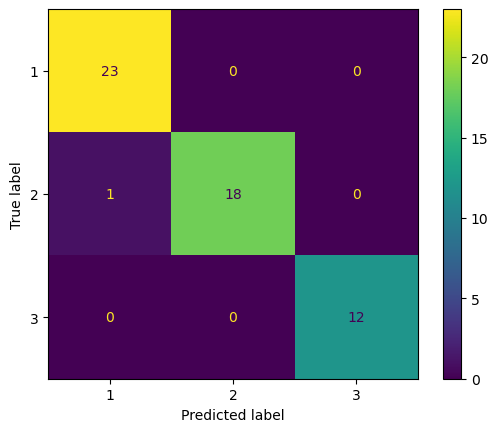

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#Plot the confusion matrix
print(cm)
plot_confusion_matrix(classifier, X_test, Y_test)
plt.show()

In [ ]:
print("Accuracy of model at K = 3 is", metrics.accuracy_score(Y_test, Y_pred))

Accuracy of model at K = 3 is 0.9814814814814815


**<font face="Lato" size=5 color=green>First Method) Finding the best K by looping through K values (with trainning data = 70% and testing data = 30% when training the model)</font>**

In [ ]:
#(Using the same training data and the same testing data but different K Values)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [i for i in range (1,31)]
scores = []

x = 0
for k in k_values:
    # Training
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)

    # Predicting the Test set results
    Y_pred = classifier.predict(X_test)

    scores.append(metrics.accuracy_score(Y_test, Y_pred))

    print('K = ', k, '\nAccuracy Score = ', scores[x])
    x+=1
    print('------------------------------------------')

K =  1 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  2 
Accuracy Score =  0.9629629629629629
------------------------------------------
K =  3 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  4 
Accuracy Score =  0.9629629629629629
------------------------------------------
K =  5 
Accuracy Score =  0.9629629629629629
------------------------------------------
K =  6 
Accuracy Score =  0.9629629629629629
------------------------------------------
K =  7 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  8 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  9 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  10 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  11 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  12 
Accuracy Score =  0.9

Text(0, 0.5, 'Accuracy Score')

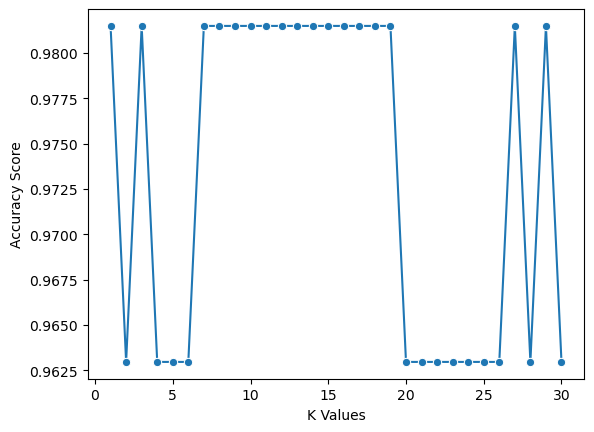

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# The best K value
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("The best K Value is", best_k)

#•  First, the np.argmax() function is used to find the index of the highest value in the scores array.
#•  This index corresponds to the best value of k (number of neighbors) for the K-Nearest Neighbors algorithm.
#•  The value of k is then retrieved from the k_values array using this index and stored in the best_k variable.
#•  Next, a KNeighborsClassifier object is created with the n_neighbors parameter set to the best_k value.
#•  This object is then trained on the training data (X_train and y_train) using the fit() method.
#•  Overall, this code is selecting the best value of k for the K-Nearest Neighbors algorithm based on the highest score, and then using this value to train a KNN model on the training data.

The best K Value is 1


**<font face="Lato" size=5 color=green>Second Method) Using Cross Validation to Get the Best Value of k</font>**

Unfortunately, there is no magic way to find the best value for k. We have to loop through many different values, then use our best judgment.

In the below code, we select a range of values for k and create an empty list to store our results. We use cross-validation to find the accuracy scores, which means we don’t need to create a training and test split, but we do need to scale our data. We then loop over the values and add the scores to our list.

To implement cross-validation, we use scikit-learn’s cross_val_score. We pass an instance of the KNN model, along with our data and a number of splits to make. In the code below, we use five splits which means the model with split the data into five equal-sized groups and use 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which we average to find the best model.

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

i = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_sc, Y, cv=5)
    scores.append(np.mean(score))
    print('K = ', k, '\nAccuracy Score = ', scores[i])
    i+=1
    print('------------------------------------------')

#This code creates a list of k values from 1 to 30 and an empty list to store the scores.
#•  It then creates a StandardScaler object and uses it to standardize the input data X.
#•  Next, it loops through each value of k in the k_values list and creates a KNeighborsClassifier object with n_neighbors set to the current value of k.
#•  It then uses cross_val_score to calculate the accuracy of the classifier using 5-fold cross-validation on the standardized data X and the target variable y.
#•  The mean accuracy score is then appended to the scores list.
#•  Overall, this code is performing a grid search over different values of k for the k-nearest neighbors classifier and using cross-validation to evaluate the performance of each model.
#•  The final output is a list of mean accuracy scores for each value of k.

K =  1 
Accuracy Score =  0.9495238095238095
------------------------------------------
K =  2 
Accuracy Score =  0.9328571428571429
------------------------------------------
K =  3 
Accuracy Score =  0.943968253968254
------------------------------------------
K =  4 
Accuracy Score =  0.9384126984126985
------------------------------------------
K =  5 
Accuracy Score =  0.9552380952380952
------------------------------------------
K =  6 
Accuracy Score =  0.9552380952380952
------------------------------------------
K =  7 
Accuracy Score =  0.9665079365079364
------------------------------------------
K =  8 
Accuracy Score =  0.9552380952380952
------------------------------------------
K =  9 
Accuracy Score =  0.9609523809523809
------------------------------------------
K =  10 
Accuracy Score =  0.9496825396825397
------------------------------------------
K =  11 
Accuracy Score =  0.9496825396825397
------------------------------------------
K =  12 
Accuracy Score =  0.95

Text(0, 0.5, 'Accuracy Score')

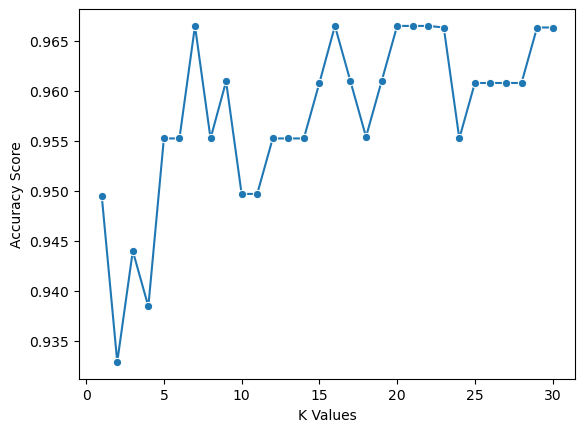

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# The best K value
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("The best K Value is", best_k)

#•  First, the np.argmax() function is used to find the index of the highest value in the scores array.
#•  This index corresponds to the best value of k (number of neighbors) for the K-Nearest Neighbors algorithm.
#•  The value of k is then retrieved from the k_values array using this index and stored in the best_k variable.
#•  Next, a KNeighborsClassifier object is created with the n_neighbors parameter set to the best_k value.
#•  This object is then trained on the training data (X_train and y_train) using the fit() method.
#•  Overall, this code is selecting the best value of k for the K-Nearest Neighbors algorithm based on the highest score, and then using this value to train a KNN model on the training data.

The best K Value is 7


<font face="Lato" size=3 color=green>train our model using the best k value (without performing PCA on data)</font>

In [ ]:
# More Evaluation Metrics
# We can now train our model using the best k value using the code below.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# best_k = 1 (from using the same training data which equals 70% and the same testing data which equals 30% and then loop through different K values)
# or 7 (from using Cross Validation)

knn2 = KNeighborsClassifier(n_neighbors=7) # best_k = 1 (from first method) or 7 (from Cross Validation method)
knn2.fit(X_train, Y_train)

Y_pred2 = knn2.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred2)
precision = precision_score(Y_test, Y_pred2, average='weighted') #https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
recall = recall_score(Y_test, Y_pred2, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9814814814814815
Precision: 0.9822530864197532
Recall: 0.9814814814814815


•   Accuracy refers to the proportion of correctly classified instances out of all instances. In this case, the model has an accuracy of 0.981, meaning it correctly classified 98.1% of instances.

•   Precision refers to the proportion of true positives (correctly classified positive instances) out of all positive predictions. In this case, the model has a precision of 0.982, meaning 98.2% of positive predictions were actually true positives.

•   Recall refers to the proportion of true positives out of all actual positive instances. The recall score indicates that the model is capturing most of the actual positive instances without overemphasizing false negatives. A recall score of 0.981 implies that the model correctly identifies approximately 98.1% of the total positive instances present in the dataset. This is generally a very good result, especially if the positive class is of high importance in the application.

<font face="Lato" size=4 color=red>===== ### Answer to I) the best k value = 1 (from using the same training data which equals 70% and the same testing data which equals 30% and then loop through different K values) ### =====</font>

<font face="Lato" size=4 color=red>===== the best k value = 7 if we use Cross Validation method to find the best K value for this dataset =====</font>

<font face="Lato" size=5 color=orange>II) K-NN Model - Choosing the best K (with performing PCA on Data) </font>

In [ ]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [ ]:
sc = StandardScaler()
X_SC = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_SC)

PCA()

In [ ]:
X_SC.shape

(178, 13)

In [ ]:
df_clean.columns[:-1]

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
#EigenVector
df_component = pd.DataFrame(pca.components_)
df_component.columns = df_clean.columns[:-1]
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
df_component

PC1       PC2       PC3       PC4       PC5  \
Alcohol               0.146387 -0.476406 -0.202003 -0.010470 -0.268002   
Malic_Acid           -0.245756 -0.226599  0.085293  0.530652  0.041152   
Ash                  -0.003573 -0.318706  0.629171 -0.219984 -0.109821   
Ash_Alcanity         -0.244703  0.014424  0.607591  0.083907  0.066228   
Magnesium             0.140871 -0.325484  0.134697 -0.338659  0.691278   
Total_Phenols         0.393392 -0.059702  0.149998  0.195395 -0.140287   
Flavanoids            0.421727  0.006426  0.149197  0.152728 -0.087439   
Nonflavanoid_Phenols -0.296836 -0.026452  0.172789 -0.195141 -0.574445   
Proanthocyanins       0.316125 -0.030469  0.143755  0.416520  0.028385   
Color_Intensity      -0.085898 -0.525124 -0.150943  0.078692 -0.090217   
Hue                   0.296619  0.273442  0.088899 -0.431177 -0.179922   
OD280                 0.374455  0.166216  0.166379  0.180443 -0.067277   
Proline               0.286709 -0.361361 -0.122896 -0.224580 -0.170337   

                           PC6       PC7       PC8       PC9      PC10  \
Alcohol              -0.224997 -0.119761 -0.361044  0.544514 -0.195210   
Malic_Acid           -0.568196  0.388535 -0.078997 -0.090598  0.308193   
Ash                  -0.145853 -0.168442  0.126520 -0.329254 -0.003949   
Ash_Alcanity          0.137085 -0.293270 -0.381577  0.240261 -0.013205   
Magnesium             0.012818  0.398640  0.129681  0.265984 -0.078181   
Total_Phenols         0.057245 -0.030278  0.456017  0.230687  0.314398   
Flavanoids            0.015450 -0.055607  0.204486  0.047237  0.169946   
Nonflavanoid_Phenols  0.178618  0.562529  0.245180  0.188803 -0.203593   
Proanthocyanins       0.519029  0.390887 -0.402349 -0.174210 -0.136382   
Color_Intensity       0.410337 -0.205092  0.069194  0.038348  0.317859   
Hue                  -0.133332  0.199886 -0.421283  0.100959  0.543240   
OD280                -0.284993 -0.067262  0.084674  0.135659 -0.499282   
Proline              -0.118806  0.040269 -0.154209 -0.553990 -0.165538   

                          PC11      PC12      PC13  
Alcohol              -0.231609 -0.232267  0.036819  
Malic_Acid            0.077691  0.090609  0.014598  
Ash                  -0.507113 -0.007010 -0.103991  
Ash_Alcanity          0.488753 -0.082269  0.073291  
Magnesium             0.083847  0.048814  0.036737  
Total_Phenols         0.220739 -0.371889 -0.458350  
Flavanoids           -0.007046  0.019527  0.831976  
Nonflavanoid_Phenols  0.122910  0.051324  0.099858  
Proanthocyanins      -0.234070 -0.070978 -0.106455  
Color_Intensity       0.074495  0.593167 -0.067993  
Hue                  -0.021064  0.240234 -0.111302  
OD280                 0.109622  0.595656 -0.199907  
Proline               0.548241 -0.133868  0.018675

In [ ]:
#Variance Ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_*100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns + 1
df_var

1          2          3         4         5         6   \
Variance  36.475803  19.609775  10.911182  7.062378  6.296983  4.815067   

                7         8         9         10        11        12        13  
Variance  4.031504  2.744533  2.232516  1.931106  1.755433  1.326634  0.807088

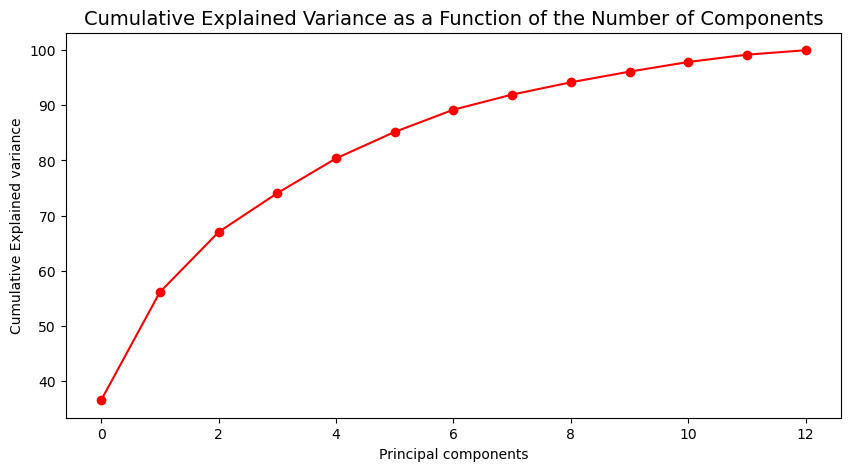

In [ ]:
#Plot Cummulative Variance
plt.figure(figsize=(10, 5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
pca=PCA(0.95) # indicates that we want to retain 95% of the total variance in the dataset when performing PCA.

# Transform your data using the PCA components
sc = StandardScaler()
X_SC = sc.fit_transform(X)
X_pca = pca.fit_transform(X_SC)

X_train_pca, X_test_pca, Y_train_2, Y_test_2 = train_test_split(X_pca, Y, test_size=0.3, random_state=1)

In [ ]:
X_pca.shape

(178, 10)

In [ ]:
print(X_train_pca)

[[-1.34801053  2.16355553 -0.05150791 ... -0.20396031 -0.60158424
  -0.21423534]
 [ 2.17918388  0.31527237  0.50963602 ... -0.82975246 -0.10200477
  -0.40916263]
 [ 2.19788178 -0.72813903  1.47259517 ... -0.05420798  0.44214639
   0.03625867]
 ...
 [-0.74885397  1.1022258   0.07834624 ... -0.92747365  1.0036449
  -0.30575226]
 [-2.79741225 -0.32318319  0.64942883 ...  0.38773454 -0.18574553
  -0.77146082]
 [ 1.12650727 -0.12552815 -0.00336526 ... -0.08359602 -0.85720268
   0.27176218]]


In [ ]:
X_train_pca.shape

(124, 10)

In [ ]:
print(X_test_pca)

[[-2.24579212e+00 -1.24103434e+00 -7.03421626e-02 -1.18788699e+00
  -2.37291429e-01 -8.44341902e-01  4.64996026e-01 -1.20830498e-01
   5.54267949e-01  2.46752487e-01]
 [-1.05815276e-01  1.90502093e+00  7.04738022e-01 -2.86128650e-01
   1.12578853e+00  1.40913349e-01  1.33348600e-01 -3.51026208e-01
   9.05121881e-01 -4.36513671e-01]
 [ 2.10061549e+00 -1.13359555e+00 -1.30095456e-01  4.28795195e-01
   1.08738048e+00 -1.32991676e+00 -2.56223738e-02  5.16881635e-01
  -5.76853860e-03  8.76730208e-02]
 [ 1.87448301e+00  1.63566401e+00 -1.40033158e+00 -7.81274137e-01
   3.32611216e+00  7.93495443e-01  1.55763291e+00 -1.37824389e+00
   2.76441766e-01 -3.73840474e-01]
 [ 2.24502784e+00 -1.93830267e+00  3.98884250e-01 -1.22403149e+00
  -5.57473511e-01 -2.82646149e-01  4.13336602e-01  3.71204342e-01
  -3.43389799e-01  6.08185044e-02]
 [-3.10697386e+00 -3.33164089e-01 -1.05429115e+00 -5.77514735e-02
  -1.13589762e+00 -5.42024151e-01  6.18752099e-01 -9.68157398e-02
   5.38009997e-01 -9.67760762e-02

In [ ]:
X_test_pca.shape

(54, 10)

In [ ]:
print(Y_train_2)

[2 2 1 2 3 2 2 1 3 2 3 1 2 1 2 1 3 3 3 3 2 2 1 3 1 2 3 1 2 1 3 2 2 1 2 2 2
 1 2 2 2 3 2 2 2 2 1 1 1 3 1 2 3 3 1 2 1 2 2 1 3 2 2 3 3 2 2 2 3 3 2 1 2 1
 3 2 2 1 1 2 1 1 1 3 1 3 3 1 2 2 3 1 2 2 1 1 1 2 2 1 3 3 2 2 2 1 3 3 3 3 3
 2 1 1 3 2 2 3 2 3 3 2 3 1]


In [ ]:
print(Y_test_2)

[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1]


**<font face="Lato" size=5 color=green>Model Fitting and Evaluation</font>**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Training
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train_pca, Y_train_2)

# Predicting the Test set results
Y_pred_2 = classifier.predict(X_test_pca)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_2, Y_pred_2)

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


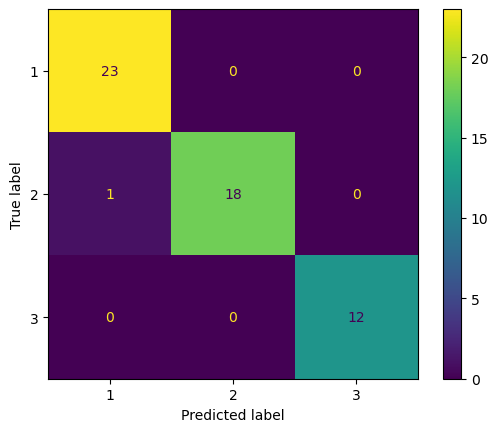

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#Plot the confusion matrix
print(cm)
plot_confusion_matrix(classifier, X_test_pca, Y_test_2)
plt.show()

In [ ]:
print("Accuracy of model at K = 3 is", metrics.accuracy_score(Y_test_2, Y_pred_2))

Accuracy of model at K = 3 is 0.9814814814814815


**<font face="Lato" size=5 color=green>First Method) Finding the best K by looping through K values (with trainning data = 70% and testing data = 30% when training the model)</font>**

In [ ]:
#(Using the same training data and the same testing data but different K Values)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [i for i in range (1,31)]
scores = []

j = 0
for k in k_values:
    # Training
    classifierr = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifierr.fit(X_train_pca, Y_train_2)

    # Predicting the Test set results
    Y_predict = classifierr.predict(X_test_pca)

    scores.append(metrics.accuracy_score(Y_test_2, Y_predict))

    print('K = ', k, '\nAccuracy Score = ', scores[j])
    j+=1
    print('------------------------------------------')

K =  1 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  2 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  3 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  4 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  5 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  6 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  7 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  8 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  9 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  10 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  11 
Accuracy Score =  0.9814814814814815
------------------------------------------
K =  12 
Accuracy Score =  0.9

Text(0, 0.5, 'Accuracy Score')

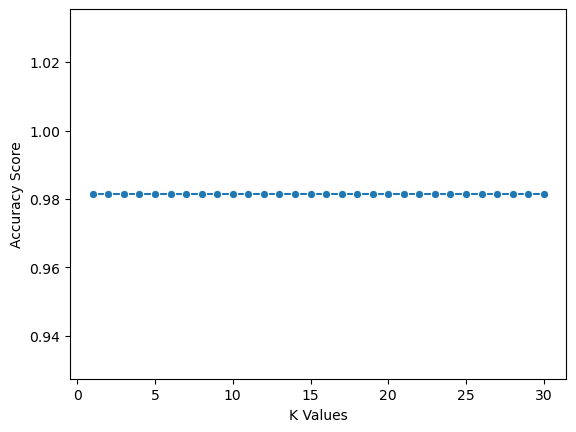

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# The best K value
best_index_pca = np.argmax(scores)
best_k_pca = k_values[best_index_pca]
print("The best K Value is", best_k_pca)

The best K Value is 1


**<font face="Lato" size=5 color=green>Second Method) Using Cross Validation to Get the Best Value of k</font>**

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

from sklearn.decomposition import PCA
pca=PCA(0.95) #indicates that we want to retain 95% of the total variance in the dataset when performing PCA.

# Transform your data using the PCA components
scaler = StandardScaler()
X_SC = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_SC)

i = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca, Y, cv=5) #X_pca has 10 dimensions but the number of rows is the same as Y
    scores.append(np.mean(score))
    print('K = ', k, '\nAccuracy Score = ', scores[i])
    i+=1
    print('------------------------------------------')

K =  1 
Accuracy Score =  0.9495238095238095
------------------------------------------
K =  2 
Accuracy Score =  0.9495238095238095
------------------------------------------
K =  3 
Accuracy Score =  0.943968253968254
------------------------------------------
K =  4 
Accuracy Score =  0.943968253968254
------------------------------------------
K =  5 
Accuracy Score =  0.9495238095238095
------------------------------------------
K =  6 
Accuracy Score =  0.9384126984126985
------------------------------------------
K =  7 
Accuracy Score =  0.9552380952380952
------------------------------------------
K =  8 
Accuracy Score =  0.9553968253968254
------------------------------------------
K =  9 
Accuracy Score =  0.9553968253968254
------------------------------------------
K =  10 
Accuracy Score =  0.9441269841269841
------------------------------------------
K =  11 
Accuracy Score =  0.9609523809523809
------------------------------------------
K =  12 
Accuracy Score =  0.966

In [ ]:
X_pca.shape #PCA reduces the dimension as a result X_pca only has 10 columns (retain 95% of the total variance in the dataset)

(178, 10)

Text(0, 0.5, 'Accuracy Score')

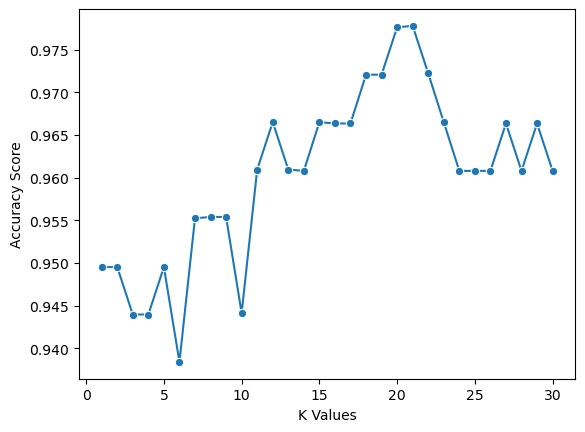

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# The best K value
best_index_pca = np.argmax(scores)
best_k_pca = k_values[best_index_pca]
print("The best K Value is", best_k_pca)

The best K Value is 21


**<font face="Lato" size=3 color=green>train our model using the best k value (with PCA on data)</font>**

In [ ]:
# More Evaluation Metrics
# We can now train our model using the best k value using the code below.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=best_k) #best_k = 1 (if use the first method) or 21 (if use the cross validation method)
knn.fit(X_train_pca, Y_train_2)

Y_predd = knn.predict(X_test_pca)

accuracy = accuracy_score(Y_test_2, Y_predd)
precision = precision_score(Y_test_2, Y_predd, average='weighted') #https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
recall = recall_score(Y_test_2, Y_predd, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9814814814814815
Precision: 0.9822530864197532
Recall: 0.9814814814814815


<font face="Lato" size=4 color=red>===== ### Answer to II) When performing PCA (pca=PCA(0.95) which indicates that we want to retain 95% of the total variance in the dataset when performing PCA.) on the data, the best k value is 1 (from using the same training data which equals 70% and the same testing data which equals 30% and then loop through different K values) ### =====</font>

<font face="Lato" size=4 color=red>===== But from Cross Validation Method, the best K value is 21 (when pca=PCA(0.95) which indicates that we want to retain 95% of the total variance in the dataset when performing PCA.) =====</font>

**<font face="Lato" size=5 color=orange>f) Discuss and Compare accuracy obtained between with PCA and without PCA</font>**

<font face="Lato" size=3 color=red> Method 1) Using the same training data (70%) and the same testing data (30%) from sklearn.model_selection.train_test_split to Find the Best K Values </font>

<font face="Lato" size=3 color=orange>- [Without PCA] ค่า K ที่ได้จากการที่เราไม่ทำการ PCA ข้อมูลนั้นจะอยู่ที่ K = 1 โดยที่เราจะได้ Accuracy ที่ประมาณ 98.1% หรือก็คือ [K = 1, และ Accuracy Score = 0.9814814814814815]</font>
    
<font face="Lato" size=3 color=orange>- [With PCA] สำหรับ ค่า K ที่ได้จากการที่เราทำการ PCA ข้อมูลนั้นจะอยู่ที่ K = 1 เมื่อเราทำการใช้ pca=PCA(0.95) ซึ่งหมายความว่าเราต้องการระบุว่าเราต้องการรักษา 95% ของความแปรปรวนทั้งหมดในชุดข้อมูลเมื่อดำเนินการ PCA (indicates that we want to retain 95% of the total variance in the dataset when performing PCA.) โดยในที่นี้เราจะได้ Accuracy ที่ประมาณ 98.1%</font>

นอกจากนี้เราจะพบว่าจากกราฟที่เราทำการพล็อตระหว่างค่า K และ Accuracy Score ของข้อมูลที่ผ่านการทำ PCA นั้นเราจะได้ว่าค่า Accuracy Score จะเท่ากันทั้งหมด (98.1% ทั้งหมด ไม่ว่าจะเพิ่มค่า K ไปเรื่อยๆก็ตาม (K ไล่จาก 1 ไปเรื่อยๆจน 30))

<font face="Lato" size=3 color=red> Method 2) Using Cross Validation to Find the Best K Values </font>

<font face="Lato" size=3 color=orange>- [Without PCA] ค่า K ที่ได้จากการที่เราไม่ทำการ PCA ข้อมูลนั้นจะอยู่ที่ K = 7 โดยที่เราจะได้ Accuracy ที่ประมาณ 96.6% หรือก็คือ [K = 7, Accuracy Score = 0.9665079365079364]</font>
    
<font face="Lato" size=3 color=orange>- [With PCA] สำหรับ ค่า K ที่ได้จากการที่เราทำการ PCA ข้อมูลนั้นจะอยู่ที่ K = 21 เมื่อเราทำการใช้ pca=PCA(0.95) ซึ่งหมายความว่าเราต้องระบุว่าเราต้องการรักษา 95% ของความแปรปรวนทั้งหมดในชุดข้อมูลเมื่อดำเนินการ PCA (indicates that we want to retain 95% of the total variance in the dataset when performing PCA.) โดยในที่นี้เราจะได้ Accuracy ที่ประมาณ 97.7777% หรือก็คือ [K = 21,   Accuracy Score = 0.9777777777777779]</font>

In [ ]:
#The End